# Initialize all modules and settings for the rest of the analysis

In [1]:
# Import dependencies
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM


In [2]:
# Setup the plt config
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RS = 42
np.random.seed(RS)

In [3]:
# Read all the name of the .csv files from the data directory
os.chdir('data')
files = os.listdir()
data = dict()
files

['BinanceCoin.csv',
 'Bitcoin.csv',
 'Cardano.csv',
 'ChainLink.csv',
 'Cosmos.csv',
 'CryptocomCoin.csv',
 'Dogecoin.csv',
 'EOS.csv',
 'Ethereum.csv',
 'Iota.csv',
 'Litecoin.csv',
 'Monero.csv',
 'NEM.csv',
 'Solana.csv',
 'Stellar.csv',
 'Tether.csv',
 'Tron.csv',
 'USDCoin.csv',
 'WrappedBitcoin.csv',
 'XRP.csv']

# Set up the methods which will be used for the rest of the notebook

In [4]:
def init_data(df: pd.DataFrame, name: str):
    ax = df.plot(x='Date', y='Close')
    ax.set_xlabel("Date")
    ax.set_title(f'{name} Closing Values')
    plt.show()


def seq(data, m_len):
    d = []
    for index in range(len(data) - m_len):
        d.append(data[index: index + m_len])
    return np.array(d)


def preprocess(data_1, m_len, t_split):
    data = seq(data_1, m_len)
    train1 = int(t_split * data.shape[0])
    X_train = data[:train1, :-1, :]
    y_train = data[:train1, -1, :]
    X_test = data[train1:, :-1, :]
    y_test = data[train1:, -1, :]
    return X_train, y_train, X_test, y_test

def train_evaluate(df: pd.DataFrame, name: str):
    # Define the sequence length
    m_len = 100

    # Instantiate the scaler
    scaler = MinMaxScaler()

    # Get closing data and scale it
    close = df.Close.values.reshape(-1, 1)
    scale_c_data = scaler.fit_transform(close)
    scale_c_data = scale_c_data[~np.isnan(scale_c_data)]
    scale_c_data = scale_c_data.reshape(-1, 1)

    # Seperate data for Algo
    X_train, y_train, X_test, y_test =\
        preprocess(scale_c_data, m_len, t_split = 0.95)

    # Define information for the Algo
    split = 0.2
    size = m_len - 1

    # Give the model its data
    model = tf.keras.Sequential()
    model.add(
        Bidirectional(
            LSTM(size, return_sequences=True),
            input_shape=(size, X_train.shape[-1])
        )
    )
    model.add(Dropout(rate=split))
    model.add(
        Bidirectional(
            LSTM((size * 2), return_sequences=True)
        )
    )
    model.add(Dropout(rate=split))
    model.add(
        Bidirectional(
            LSTM(size, return_sequences=False)
        )
    )
    model.add(Dense(units=1))
    model.add(Activation('linear'))
    b_size = 64
    model.compile(
        loss='mean_squared_error',
        optimizer='adam'
    )

    # Train the model
    history = model.fit(
        X_train,
        y_train,
        epochs=5,
        batch_size=b_size,
        shuffle=False,
        validation_split=0.1
    )

    # Plot the data to show loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{name} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Create the predictive information from the model
    y_2 = model.predict(X_test)
    y_test_inverse = scaler.inverse_transform(y_test)
    y_2_inverse = scaler.inverse_transform(y_2)
    
    # Plot the data to show the difference in the Actual vs Prediction
    plt.plot(y_test_inverse, label="Actual Price", color='green')
    plt.plot(y_2_inverse, label="Predicted Price", color='red')
    plt.title(f'{name} price prediction')
    plt.xlabel('Time [days]')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()

# Run the code for all the different crypto coins

Now working on BinanceCoin


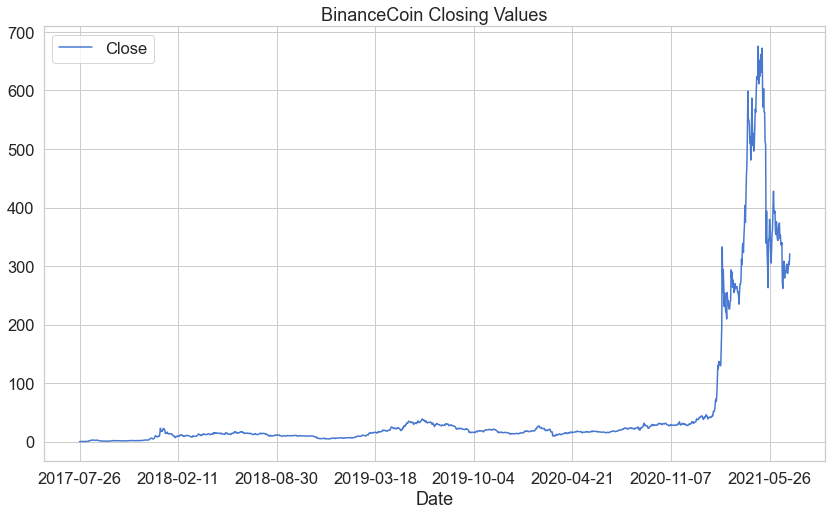

Epoch 1/5
18/18 [==============================] - 35s 1s/step - loss: 2.7200e-04 - val_loss: 0.1228
Epoch 2/5
18/18 [==============================] - 24s 1s/step - loss: 1.5791e-04 - val_loss: 0.0761
Epoch 3/5
18/18 [==============================] - 23s 1s/step - loss: 9.6373e-05 - val_loss: 0.0568
Epoch 4/5
18/18 [==============================] - 25s 1s/step - loss: 7.1027e-05 - val_loss: 0.0279
Epoch 5/5
18/18 [==============================] - 27s 1s/step - loss: 3.3129e-05 - val_loss: 0.0154


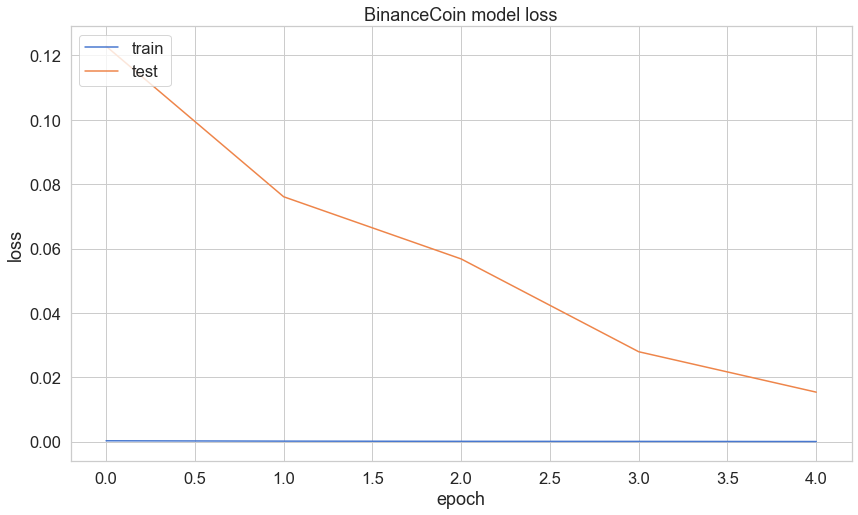

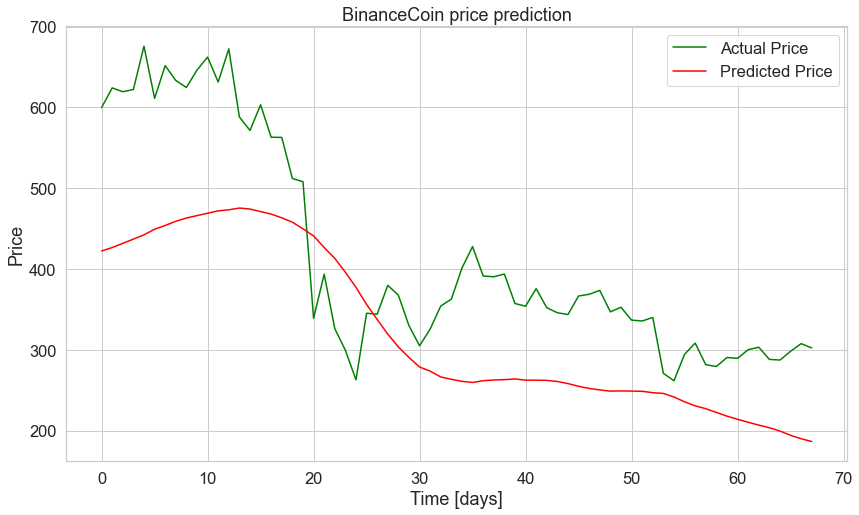







Now working on Bitcoin


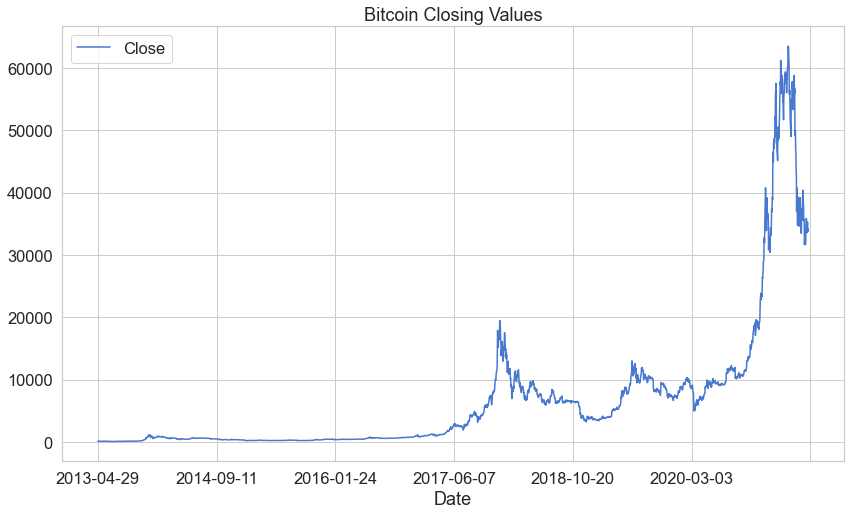

Epoch 1/5
39/39 [==============================] - 83s 2s/step - loss: 0.0018 - val_loss: 0.0108
Epoch 2/5
39/39 [==============================] - 65s 2s/step - loss: 0.0025 - val_loss: 0.0123
Epoch 3/5
39/39 [==============================] - 66s 2s/step - loss: 6.6257e-04 - val_loss: 0.0016
Epoch 4/5
39/39 [==============================] - 66s 2s/step - loss: 2.3423e-04 - val_loss: 0.0033
Epoch 5/5
39/39 [==============================] - 67s 2s/step - loss: 7.0273e-04 - val_loss: 0.0031


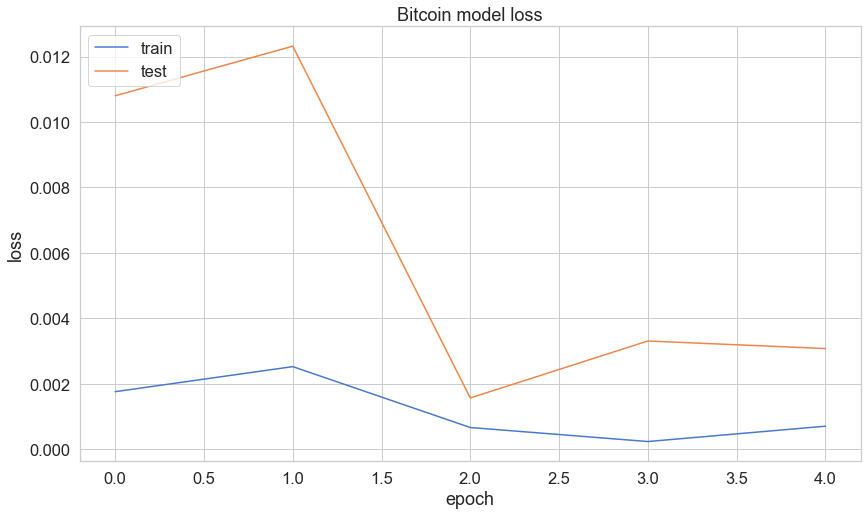

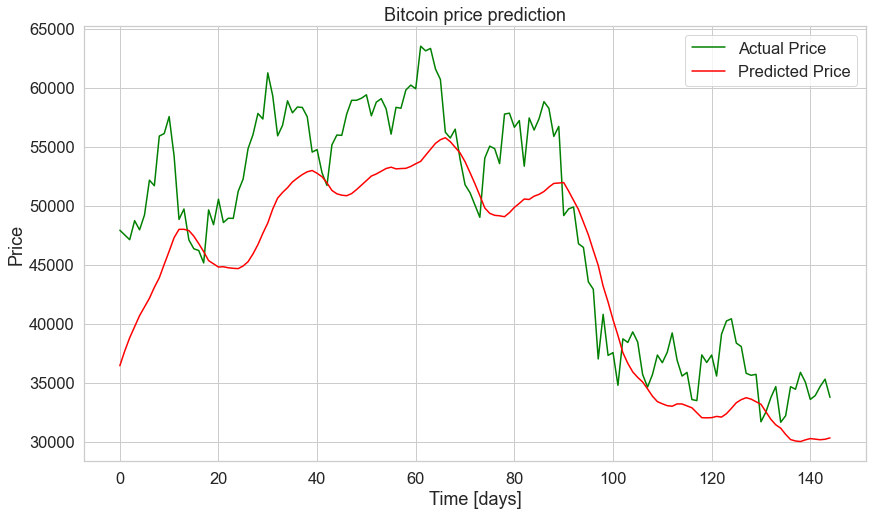







Now working on Cardano


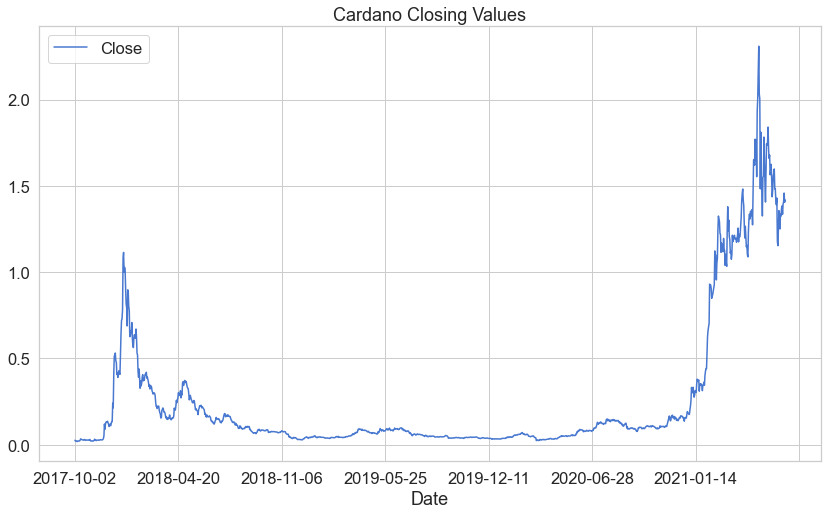

Epoch 1/5
18/18 [==============================] - 42s 2s/step - loss: 0.0031 - val_loss: 0.0612
Epoch 2/5
18/18 [==============================] - 29s 2s/step - loss: 0.0033 - val_loss: 0.0230
Epoch 3/5
18/18 [==============================] - 28s 2s/step - loss: 2.9070e-04 - val_loss: 0.0293
Epoch 4/5
18/18 [==============================] - 28s 2s/step - loss: 8.6578e-04 - val_loss: 0.0040
Epoch 5/5
18/18 [==============================] - 30s 2s/step - loss: 7.0980e-04 - val_loss: 0.0749


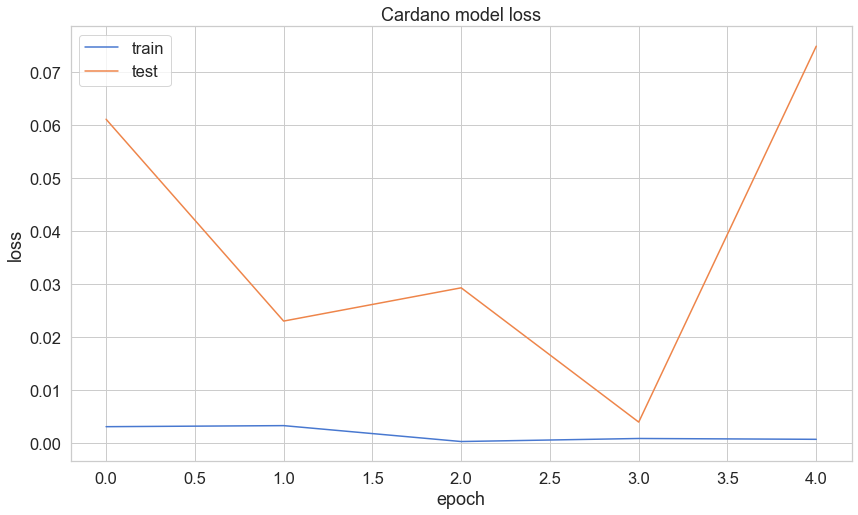

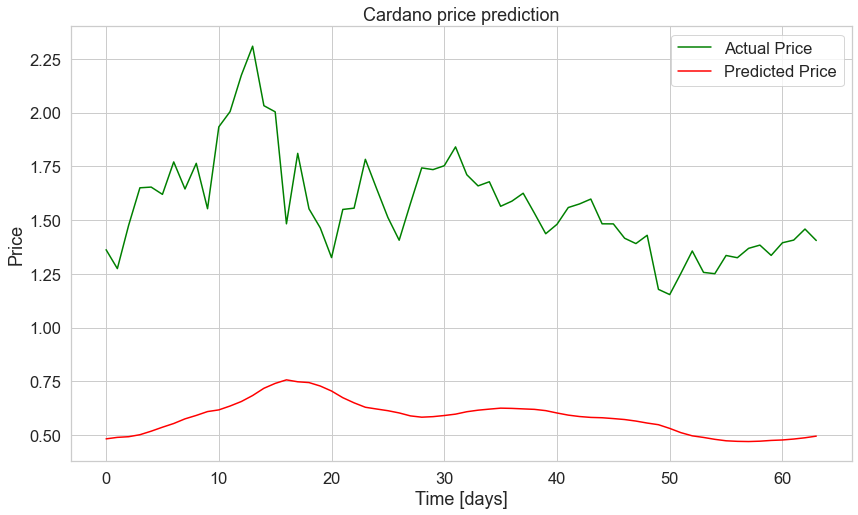







Now working on ChainLink


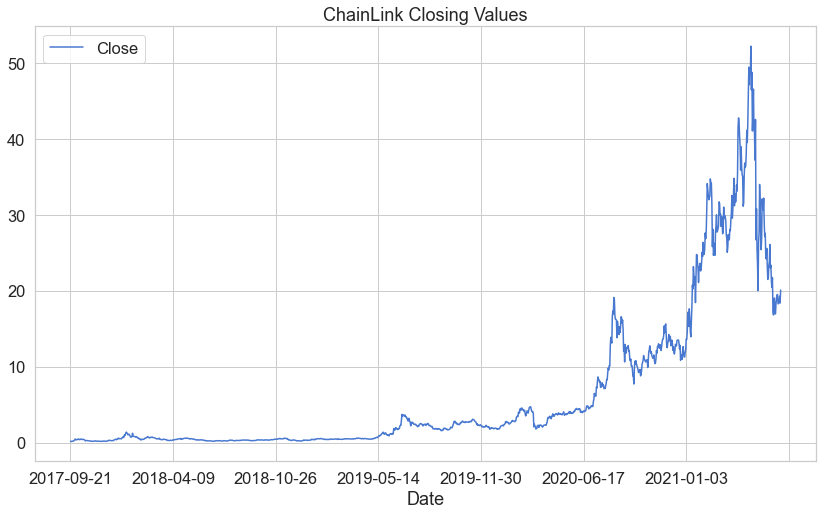

Epoch 1/5
18/18 [==============================] - 38s 2s/step - loss: 0.0017 - val_loss: 0.0177
Epoch 2/5
18/18 [==============================] - 27s 2s/step - loss: 0.0060 - val_loss: 0.0215
Epoch 3/5
18/18 [==============================] - 29s 2s/step - loss: 0.0111 - val_loss: 0.0630
Epoch 4/5
18/18 [==============================] - 29s 2s/step - loss: 0.0028 - val_loss: 0.0278
Epoch 5/5
18/18 [==============================] - 30s 2s/step - loss: 0.0039 - val_loss: 0.0137


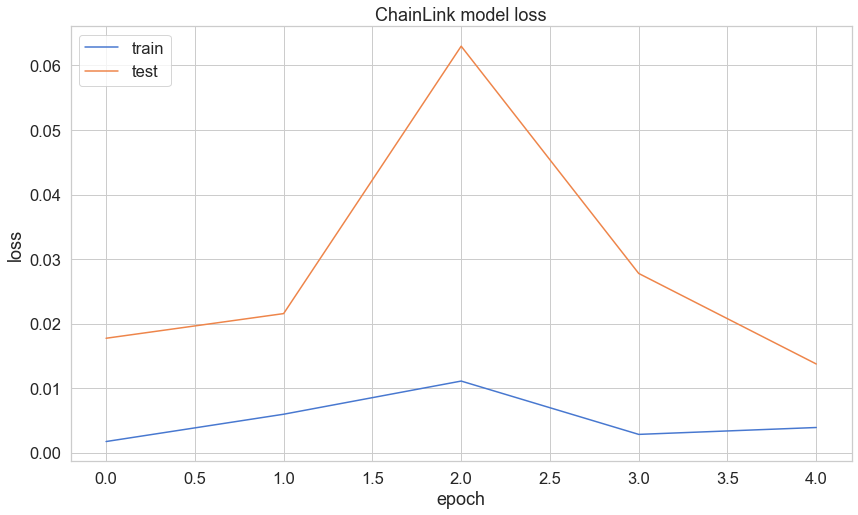

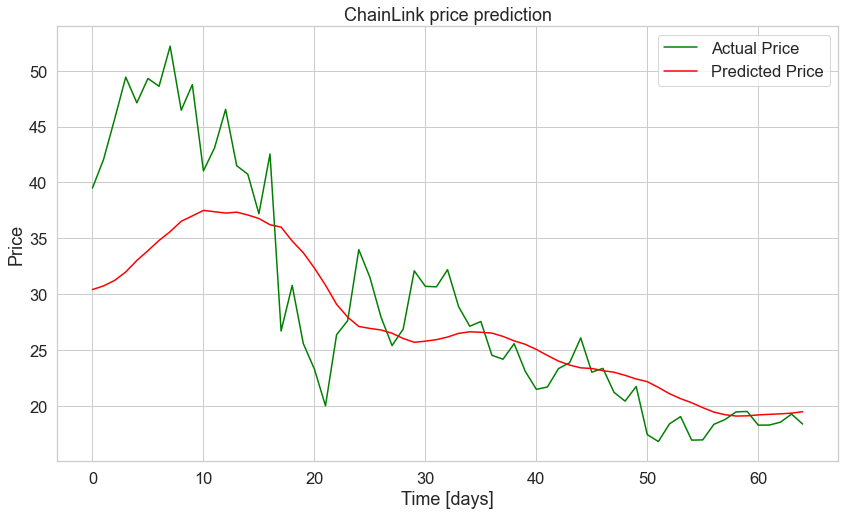







Now working on Cosmos


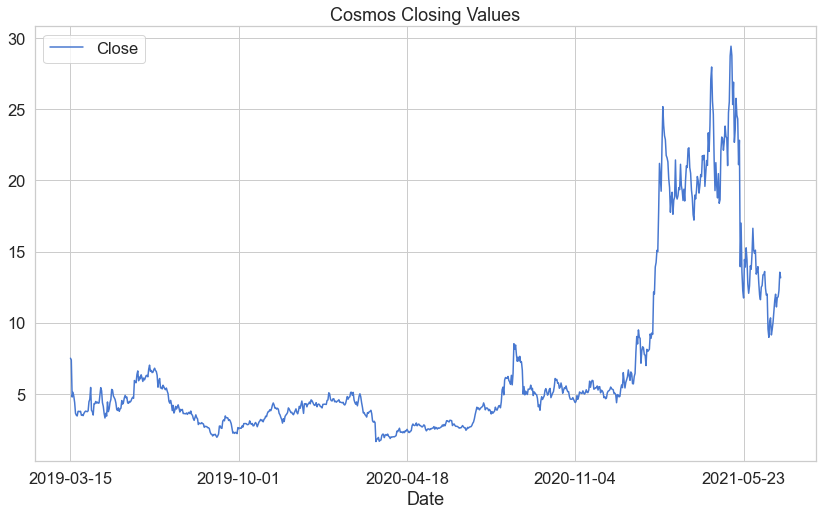

Epoch 1/5
10/10 [==============================] - 31s 2s/step - loss: 0.0037 - val_loss: 0.0195
Epoch 2/5
10/10 [==============================] - 20s 2s/step - loss: 0.0111 - val_loss: 0.0862
Epoch 3/5
10/10 [==============================] - 21s 2s/step - loss: 0.0061 - val_loss: 0.0197
Epoch 4/5
10/10 [==============================] - 21s 2s/step - loss: 0.0142 - val_loss: 0.1476
Epoch 5/5
10/10 [==============================] - 21s 2s/step - loss: 0.0098 - val_loss: 0.0290


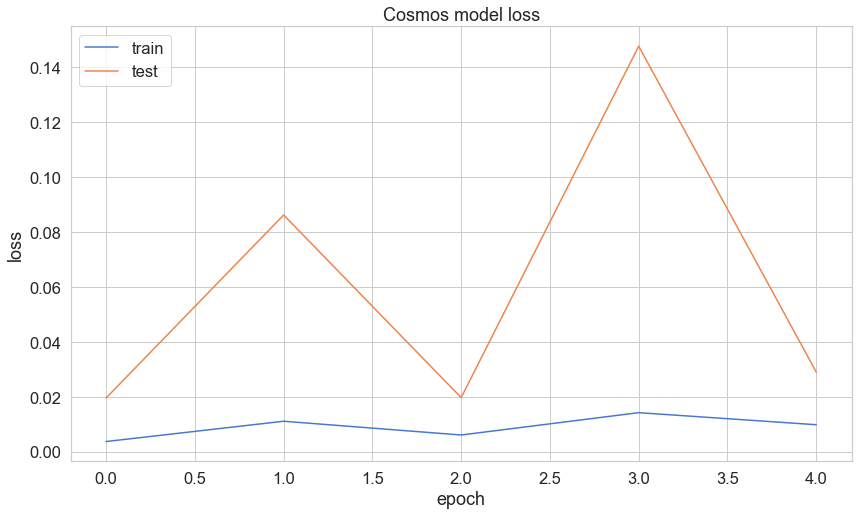

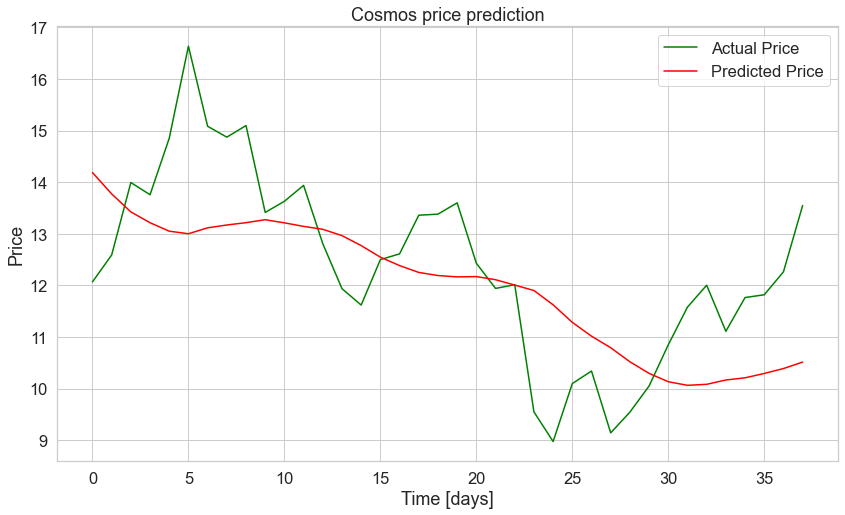







Now working on CryptocomCoin


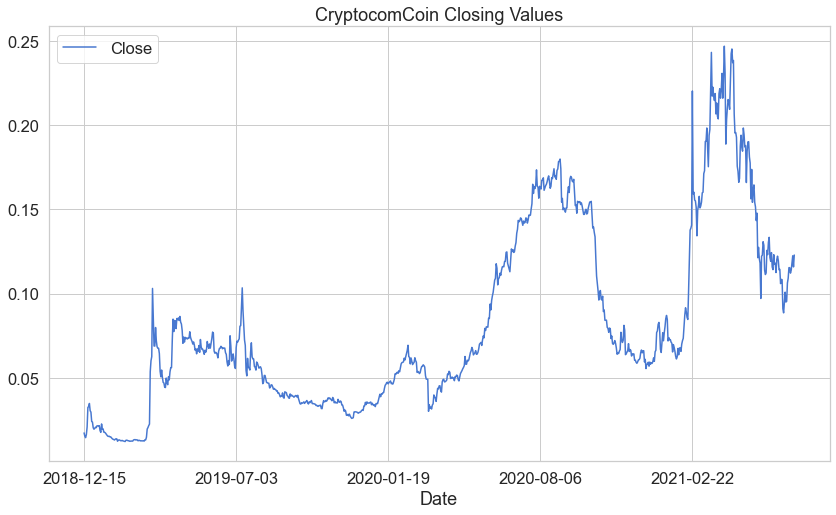

Epoch 1/5
12/12 [==============================] - 35s 2s/step - loss: 0.0330 - val_loss: 0.0570
Epoch 2/5
12/12 [==============================] - 23s 2s/step - loss: 0.0230 - val_loss: 0.0165
Epoch 3/5
12/12 [==============================] - 24s 2s/step - loss: 0.0104 - val_loss: 0.0206
Epoch 4/5
12/12 [==============================] - 23s 2s/step - loss: 0.0102 - val_loss: 0.0821
Epoch 5/5
12/12 [==============================] - 23s 2s/step - loss: 0.0180 - val_loss: 0.0256


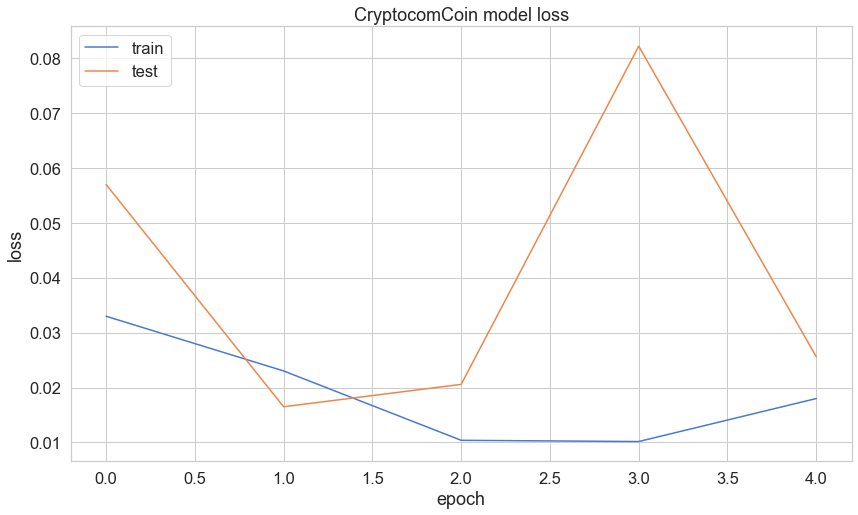

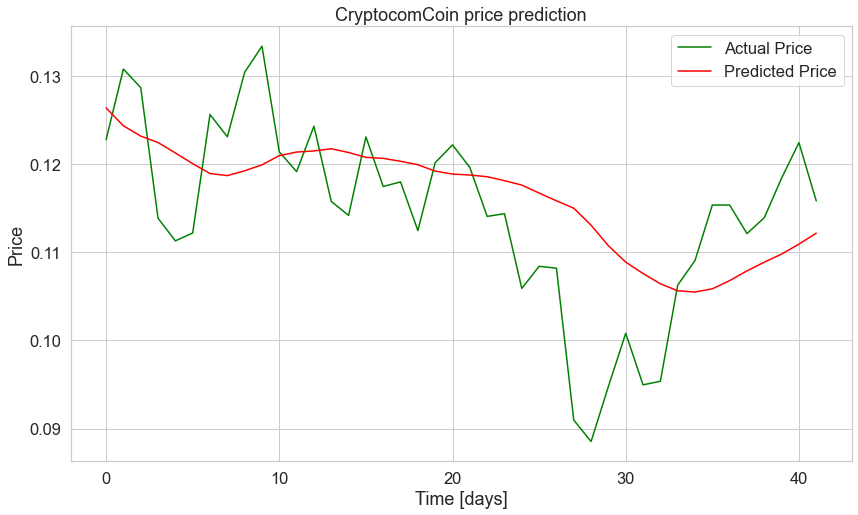







Now working on Dogecoin


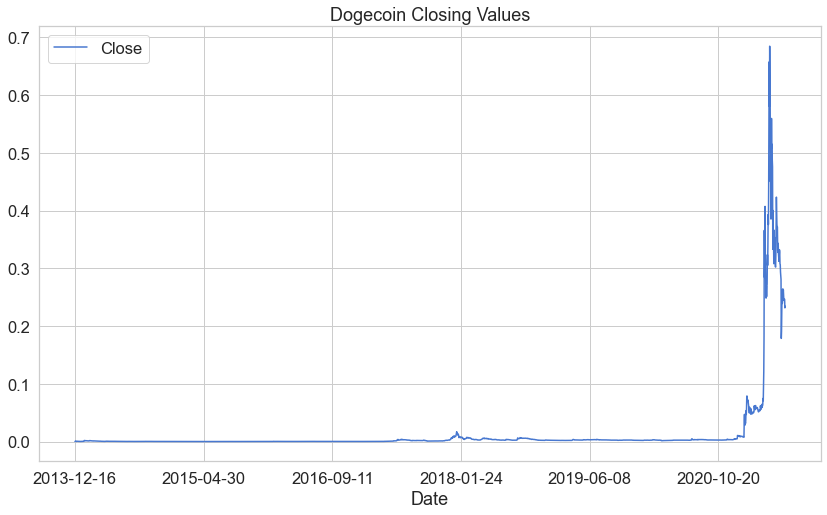

Epoch 1/5
36/36 [==============================] - 1447s 41s/step - loss: 1.1670e-04 - val_loss: 5.7129e-04
Epoch 2/5
36/36 [==============================] - 59s 2s/step - loss: 1.3848e-05 - val_loss: 5.3737e-04
Epoch 3/5
36/36 [==============================] - 60s 2s/step - loss: 1.5268e-05 - val_loss: 5.4033e-04
Epoch 4/5
36/36 [==============================] - 58s 2s/step - loss: 1.1712e-05 - val_loss: 5.3712e-04
Epoch 5/5
36/36 [==============================] - 58s 2s/step - loss: 9.0938e-06 - val_loss: 5.1713e-04


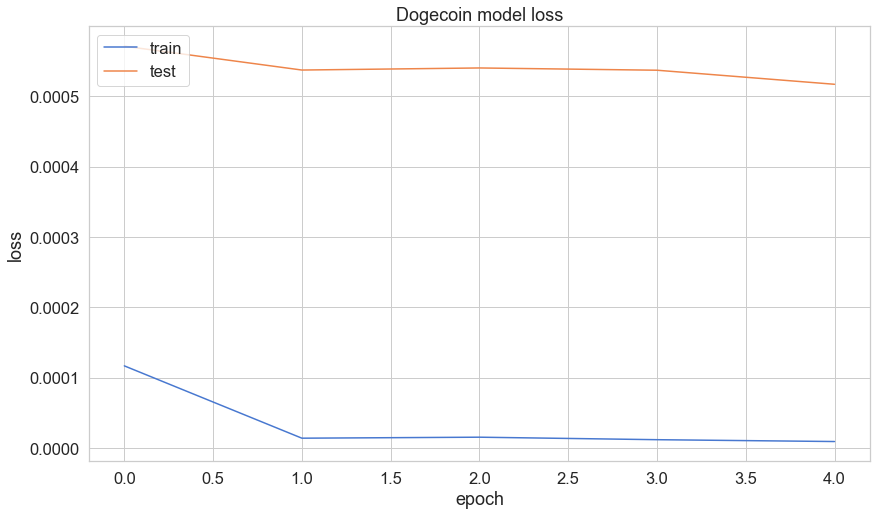

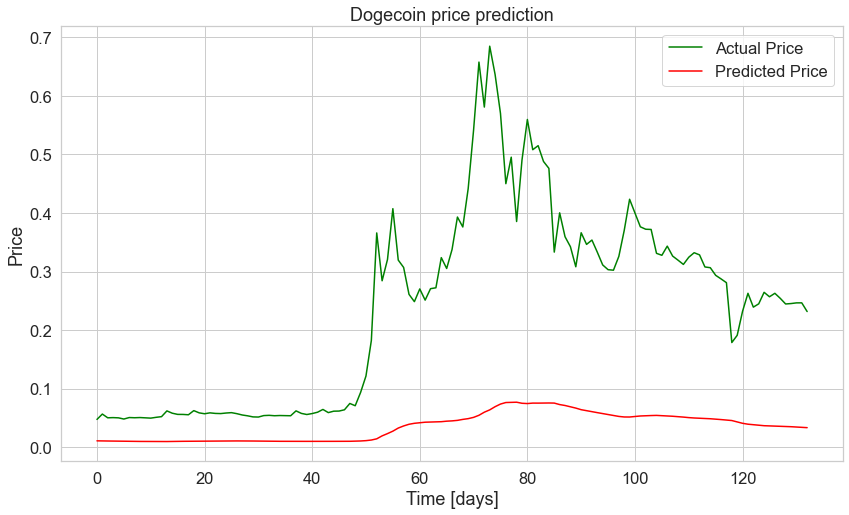







Now working on EOS


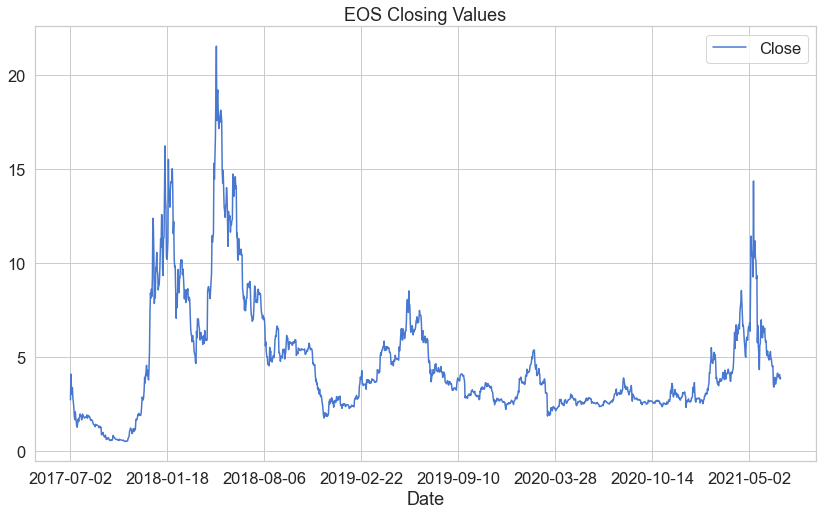

Epoch 1/5
19/19 [==============================] - 41s 2s/step - loss: 0.0115 - val_loss: 0.0021
Epoch 2/5
19/19 [==============================] - 31s 2s/step - loss: 0.0105 - val_loss: 0.0024
Epoch 3/5
19/19 [==============================] - 37s 2s/step - loss: 0.0081 - val_loss: 0.0030
Epoch 4/5
19/19 [==============================] - 37s 2s/step - loss: 0.0096 - val_loss: 0.0053
Epoch 5/5
19/19 [==============================] - 37s 2s/step - loss: 0.0072 - val_loss: 0.0034


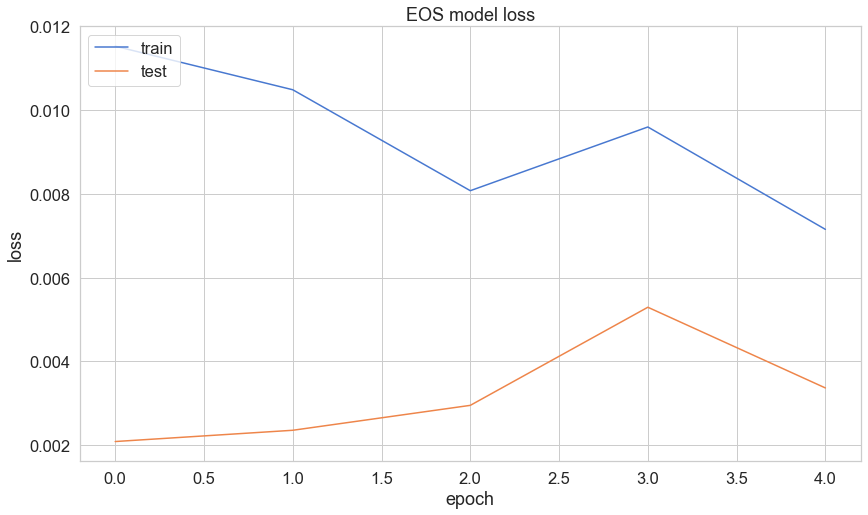

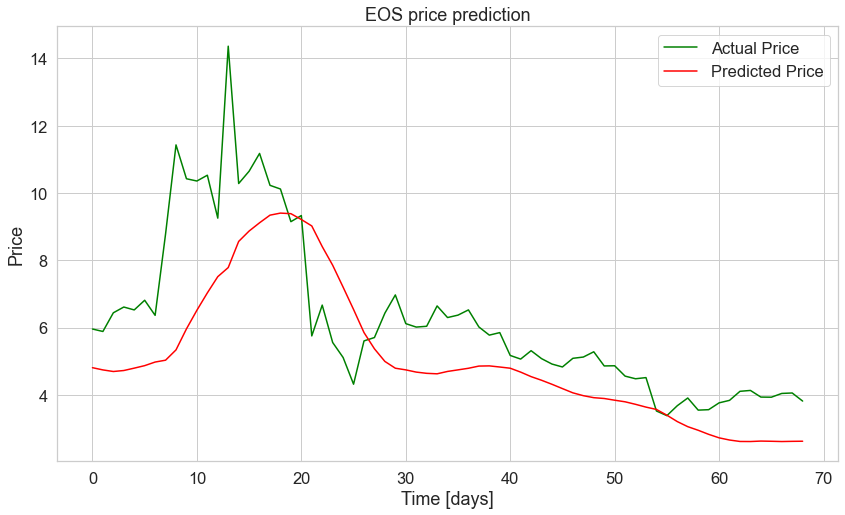







Now working on Ethereum


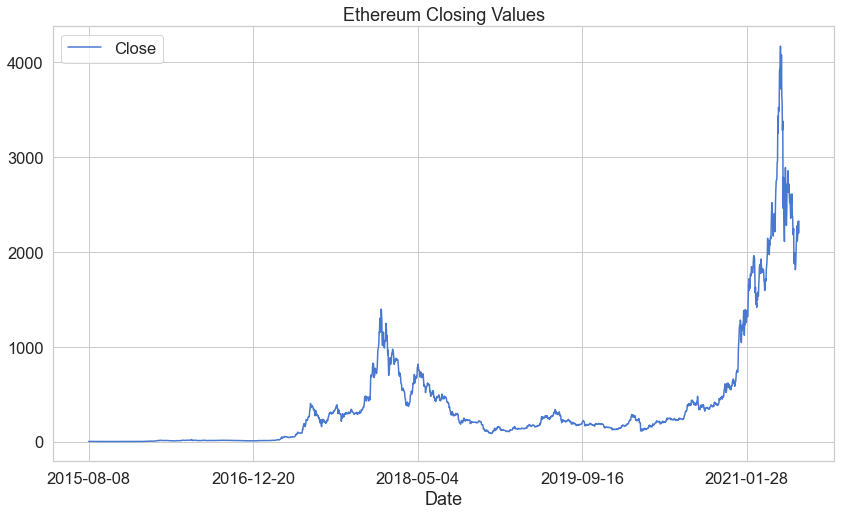

Epoch 1/5
28/28 [==============================] - 67s 2s/step - loss: 0.0015 - val_loss: 0.0330
Epoch 2/5
28/28 [==============================] - 55s 2s/step - loss: 0.0031 - val_loss: 0.0352
Epoch 3/5
28/28 [==============================] - 56s 2s/step - loss: 0.0020 - val_loss: 0.0018
Epoch 4/5
28/28 [==============================] - 55s 2s/step - loss: 2.3105e-04 - val_loss: 8.5124e-04
Epoch 5/5
28/28 [==============================] - 57s 2s/step - loss: 1.4000e-04 - val_loss: 0.0025


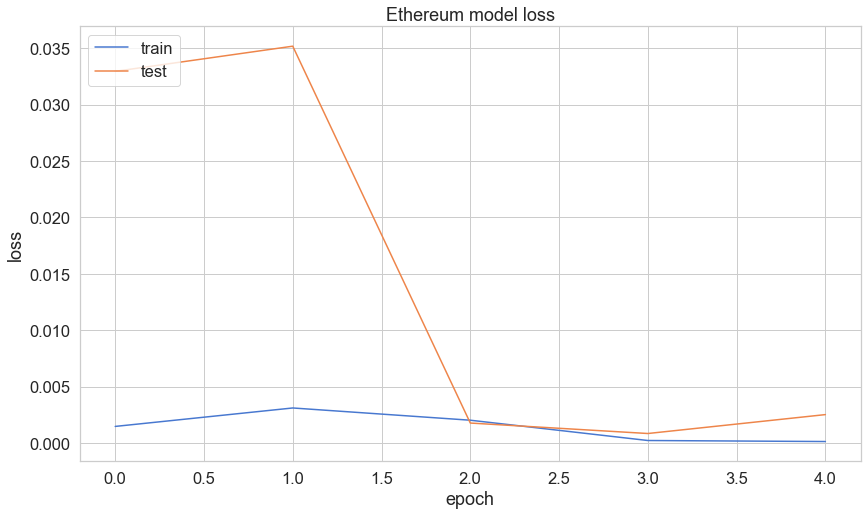

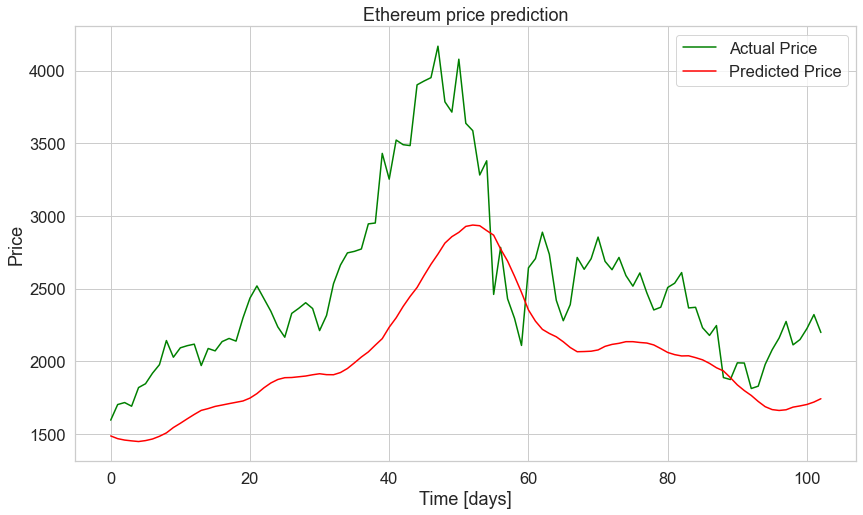







Now working on Iota


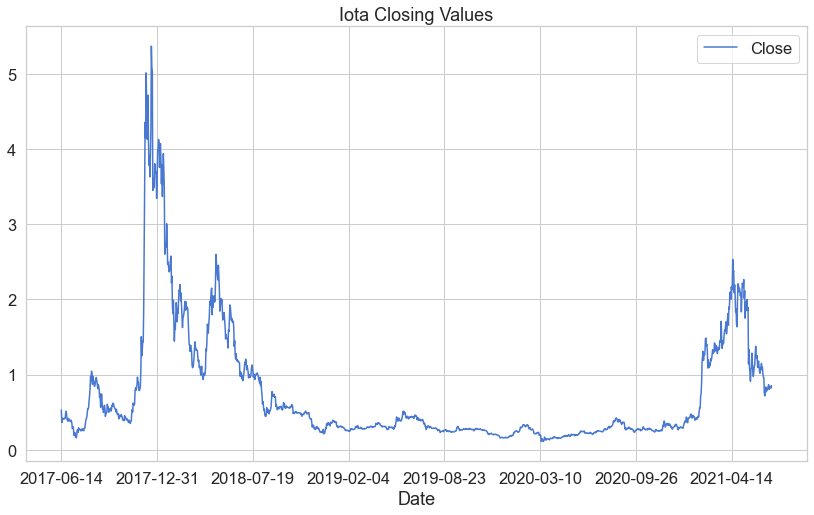

Epoch 1/5
19/19 [==============================] - 47s 2s/step - loss: 0.0186 - val_loss: 0.0243
Epoch 2/5
19/19 [==============================] - 34s 2s/step - loss: 0.0244 - val_loss: 0.0016
Epoch 3/5
19/19 [==============================] - 34s 2s/step - loss: 0.0035 - val_loss: 0.0502
Epoch 4/5
19/19 [==============================] - 35s 2s/step - loss: 0.0379 - val_loss: 0.0221
Epoch 5/5
19/19 [==============================] - 35s 2s/step - loss: 0.0110 - val_loss: 0.0065


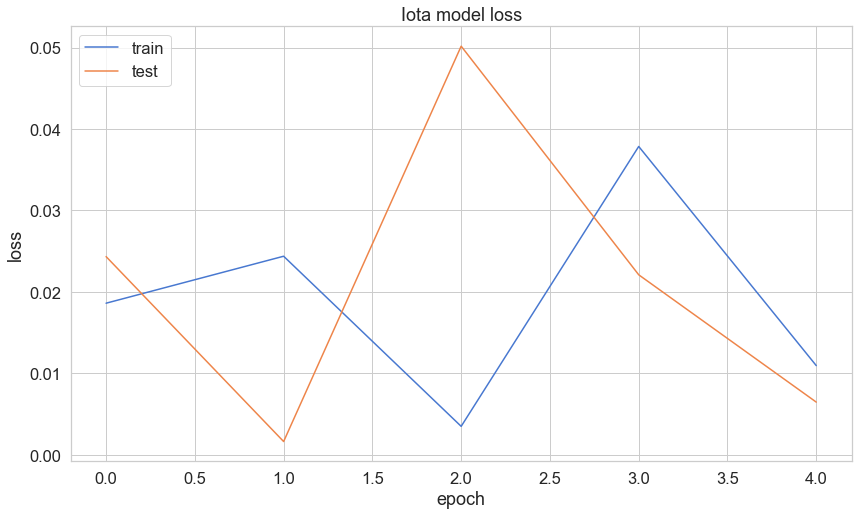

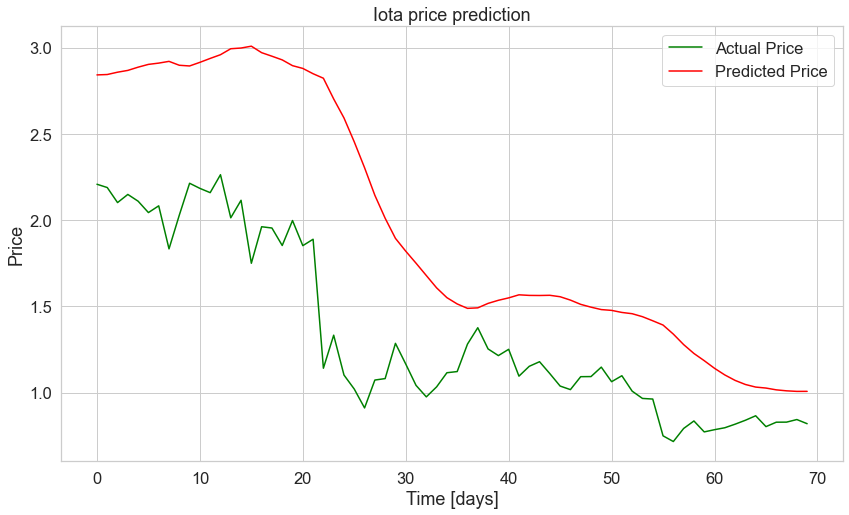







Now working on Litecoin


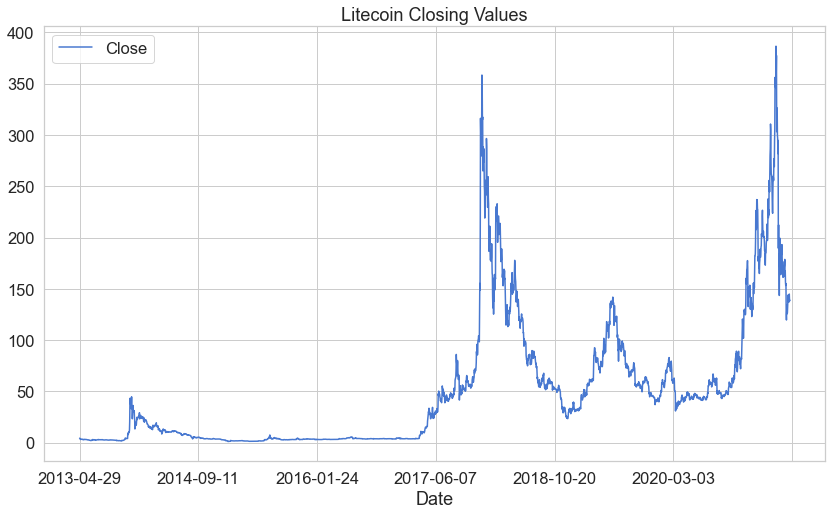

Epoch 1/5
39/39 [==============================] - 86s 2s/step - loss: 0.0043 - val_loss: 0.0023
Epoch 2/5
39/39 [==============================] - 85s 2s/step - loss: 0.0029 - val_loss: 6.8194e-04
Epoch 3/5
39/39 [==============================] - 86s 2s/step - loss: 0.0014 - val_loss: 0.0034
Epoch 4/5
39/39 [==============================] - 85s 2s/step - loss: 0.0039 - val_loss: 0.0032
Epoch 5/5
39/39 [==============================] - 90s 2s/step - loss: 0.0024 - val_loss: 0.0051


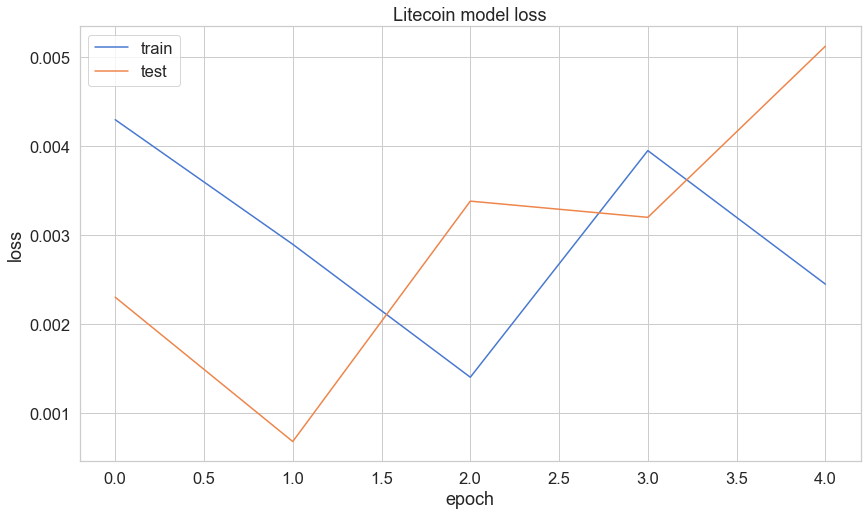

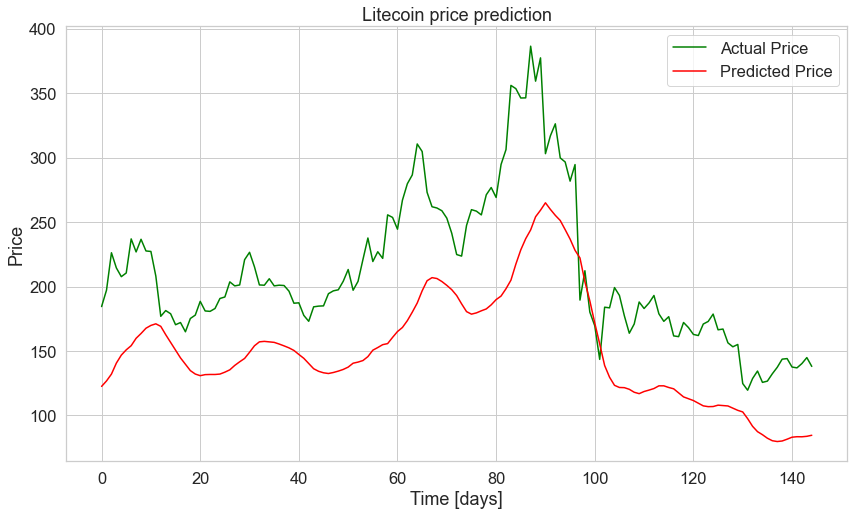







Now working on Monero


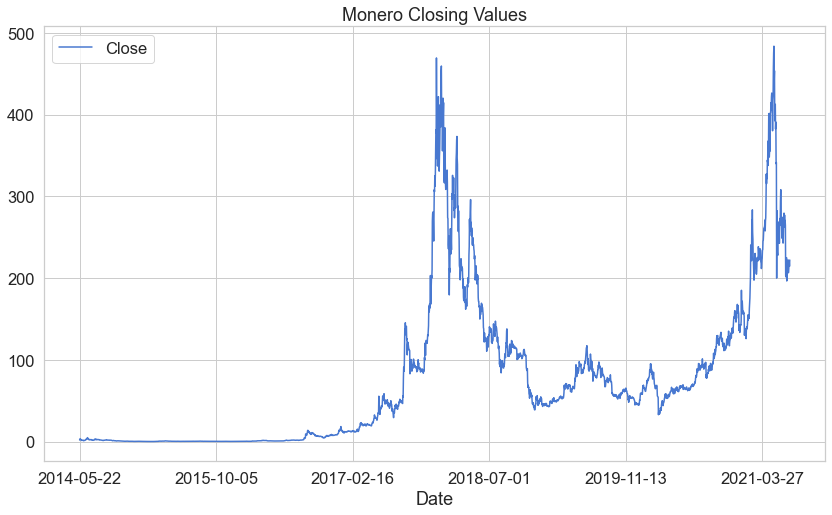

Epoch 1/5
34/34 [==============================] - 92s 2s/step - loss: 0.0121 - val_loss: 0.0163
Epoch 2/5
34/34 [==============================] - 115s 3s/step - loss: 0.0238 - val_loss: 0.0140
Epoch 3/5
34/34 [==============================] - 70s 2s/step - loss: 0.0092 - val_loss: 0.0026
Epoch 4/5
34/34 [==============================] - 69s 2s/step - loss: 0.0037 - val_loss: 0.0092
Epoch 5/5
34/34 [==============================] - 69s 2s/step - loss: 0.0096 - val_loss: 0.0011


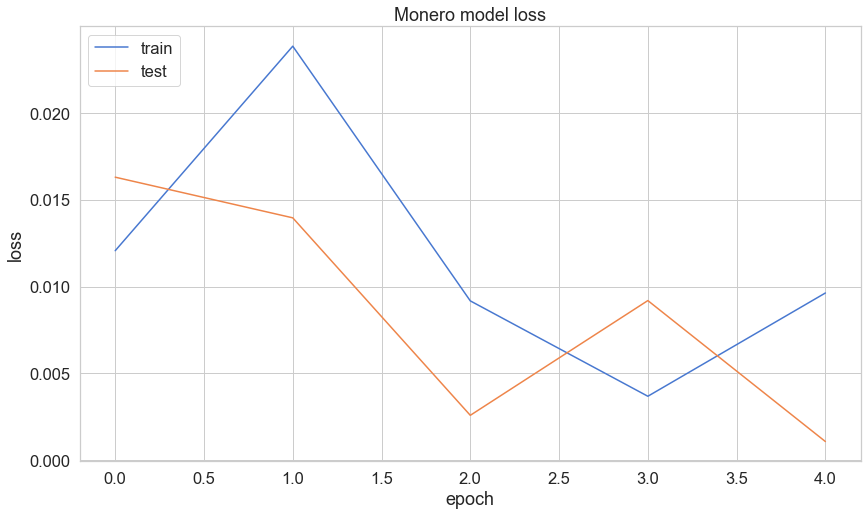

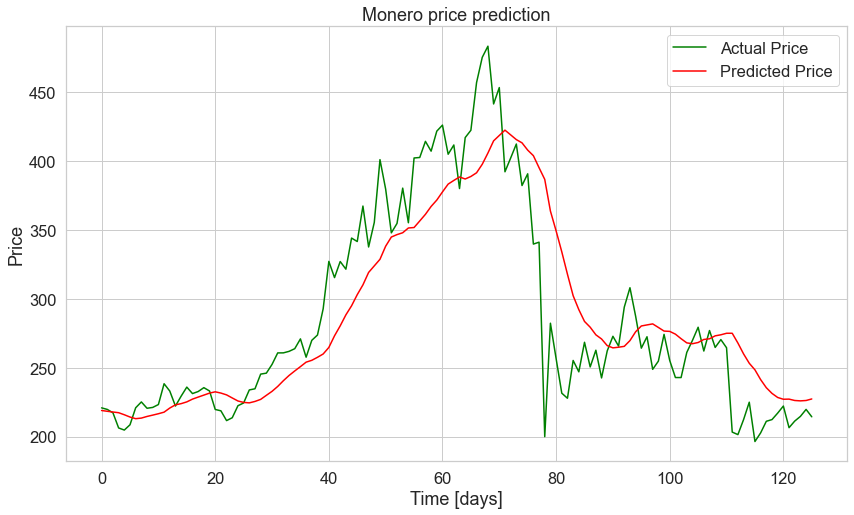







Now working on NEM


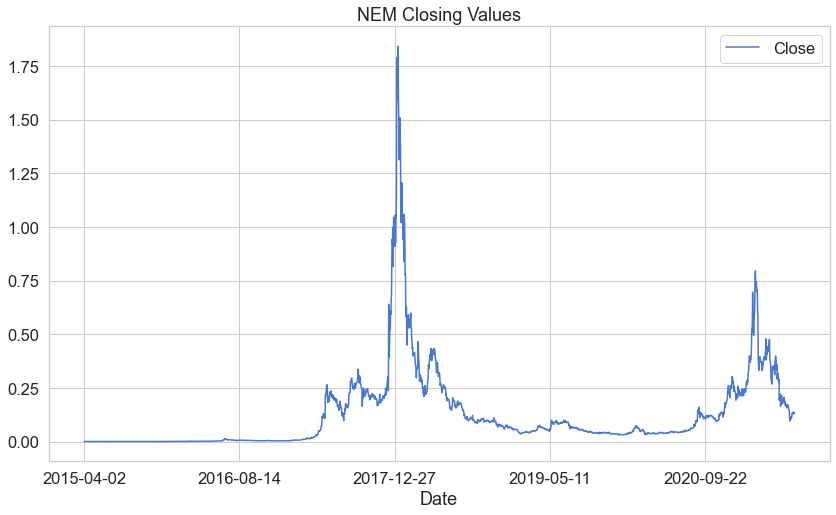

Epoch 1/5
30/30 [==============================] - 70s 2s/step - loss: 0.0081 - val_loss: 0.0159
Epoch 2/5
30/30 [==============================] - 58s 2s/step - loss: 0.0115 - val_loss: 0.0017
Epoch 3/5
30/30 [==============================] - 58s 2s/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/5
30/30 [==============================] - 58s 2s/step - loss: 0.0022 - val_loss: 0.0112
Epoch 5/5
30/30 [==============================] - 58s 2s/step - loss: 0.0100 - val_loss: 0.0044


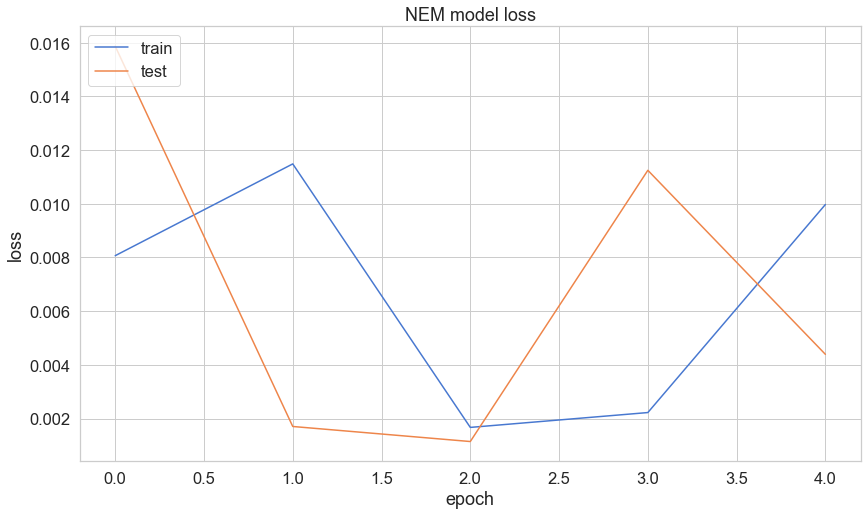

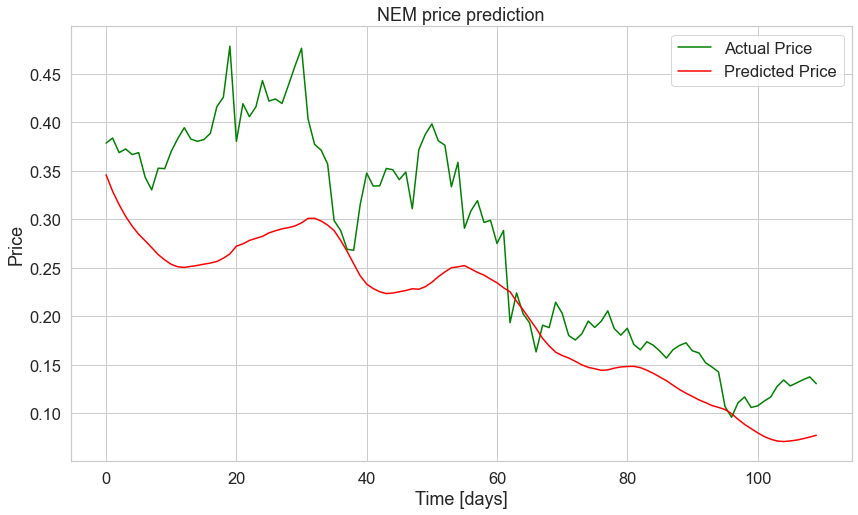







Now working on Solana


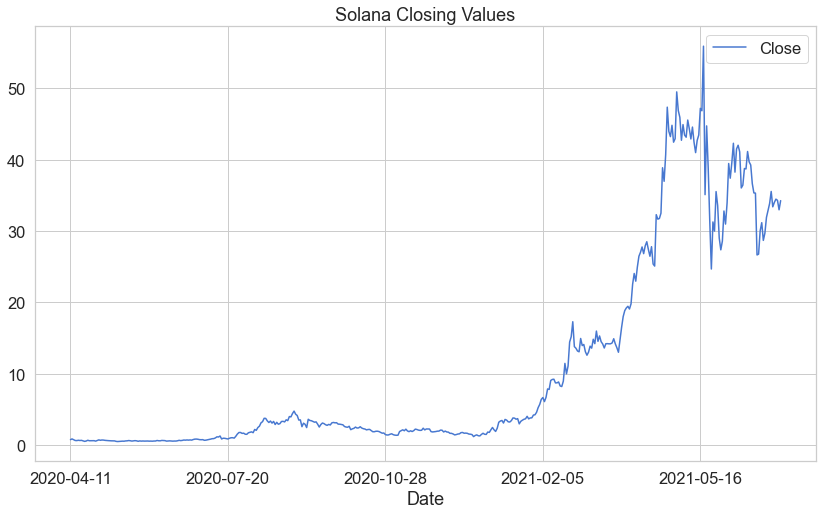

Epoch 1/5
5/5 [==============================] - 20s 3s/step - loss: 0.0253 - val_loss: 0.0213
Epoch 2/5
5/5 [==============================] - 10s 2s/step - loss: 0.0356 - val_loss: 0.0514
Epoch 3/5
5/5 [==============================] - 10s 2s/step - loss: 0.0404 - val_loss: 0.2050
Epoch 4/5
5/5 [==============================] - 10s 2s/step - loss: 0.0218 - val_loss: 0.1017
Epoch 5/5
5/5 [==============================] - 10s 2s/step - loss: 0.0110 - val_loss: 0.0173


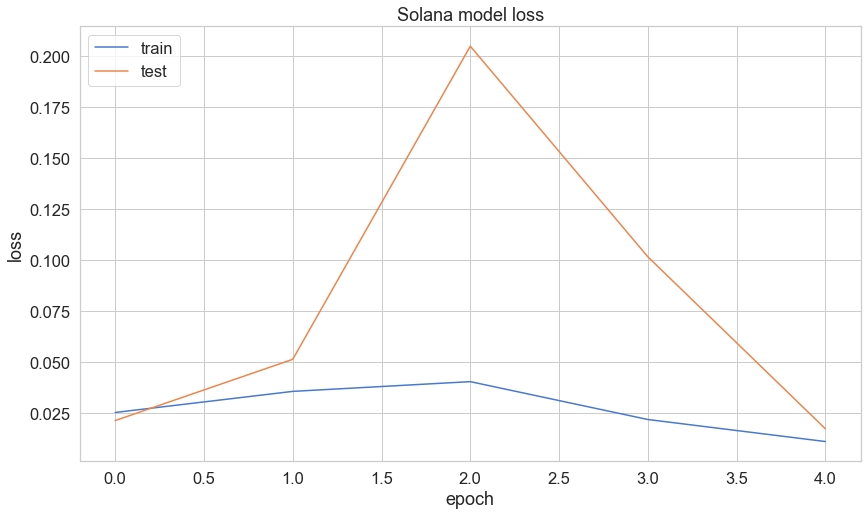

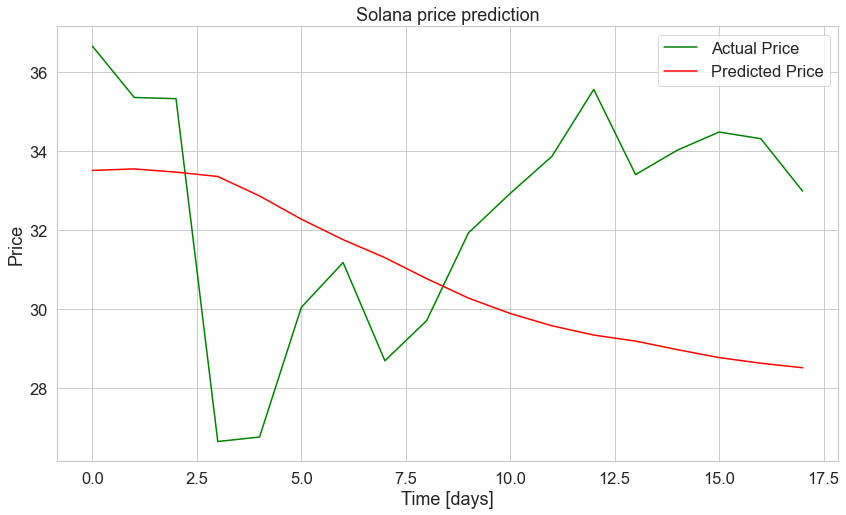







Now working on Stellar


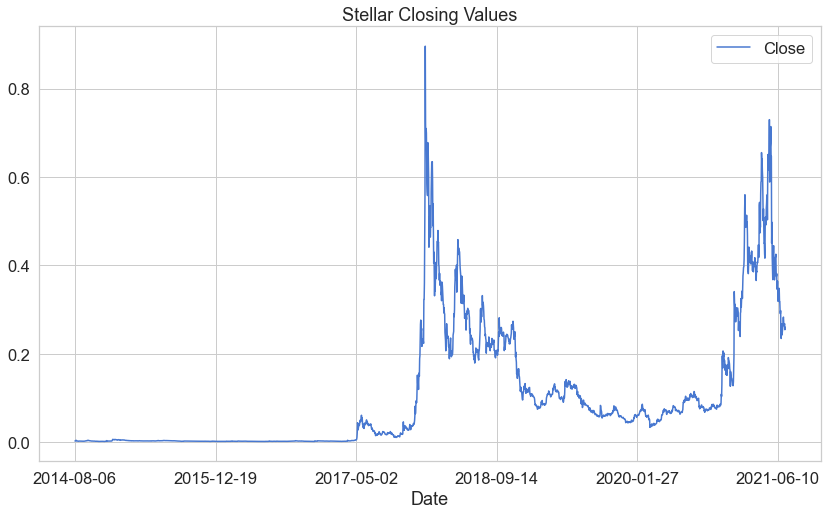

Epoch 1/5
33/33 [==============================] - 72s 2s/step - loss: 0.0079 - val_loss: 0.0235
Epoch 2/5
33/33 [==============================] - 63s 2s/step - loss: 0.0113 - val_loss: 0.0208
Epoch 3/5
33/33 [==============================] - 64s 2s/step - loss: 0.0088 - val_loss: 0.0059
Epoch 4/5
33/33 [==============================] - 63s 2s/step - loss: 0.0030 - val_loss: 0.0129
Epoch 5/5
33/33 [==============================] - 506s 16s/step - loss: 0.0055 - val_loss: 0.0180


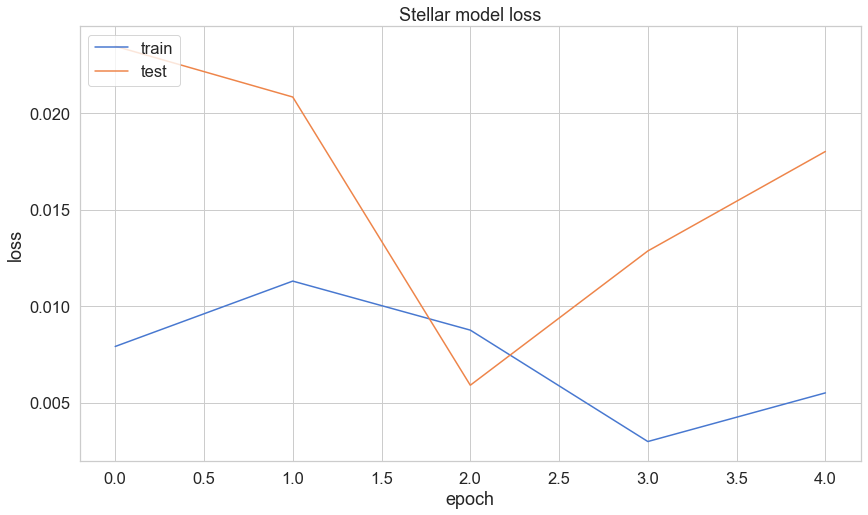

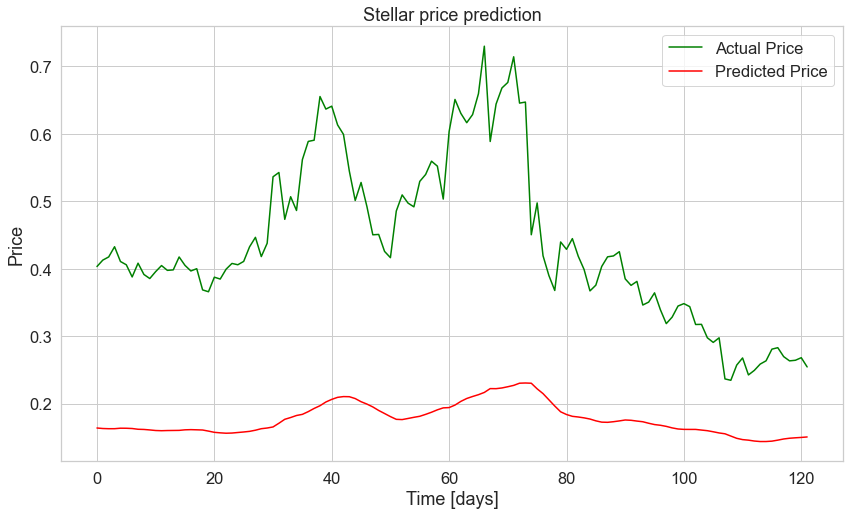







Now working on Tether


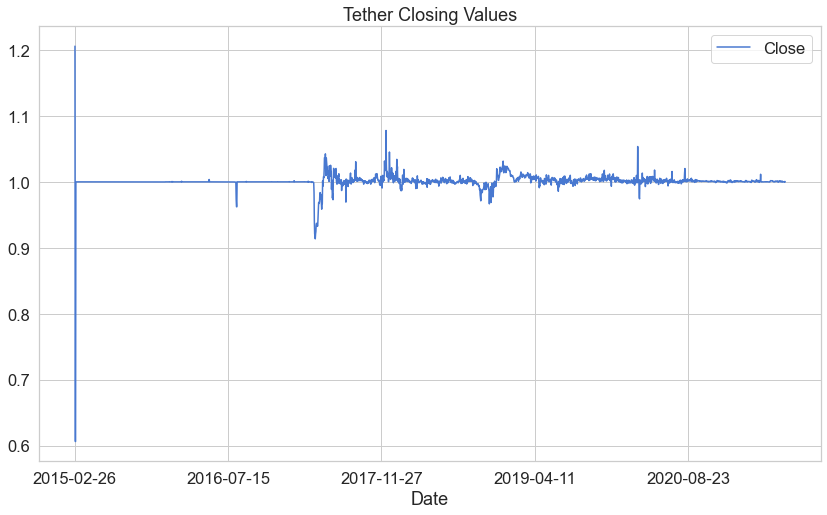

Epoch 1/5
30/30 [==============================] - 60s 2s/step - loss: 0.0382 - val_loss: 0.0019
Epoch 2/5
30/30 [==============================] - 47s 2s/step - loss: 8.6599e-04 - val_loss: 1.7024e-04
Epoch 3/5
30/30 [==============================] - 48s 2s/step - loss: 2.9624e-04 - val_loss: 9.7534e-06
Epoch 4/5
30/30 [==============================] - 53s 2s/step - loss: 3.0332e-04 - val_loss: 3.8949e-06
Epoch 5/5
30/30 [==============================] - 57s 2s/step - loss: 2.9520e-04 - val_loss: 5.3137e-06


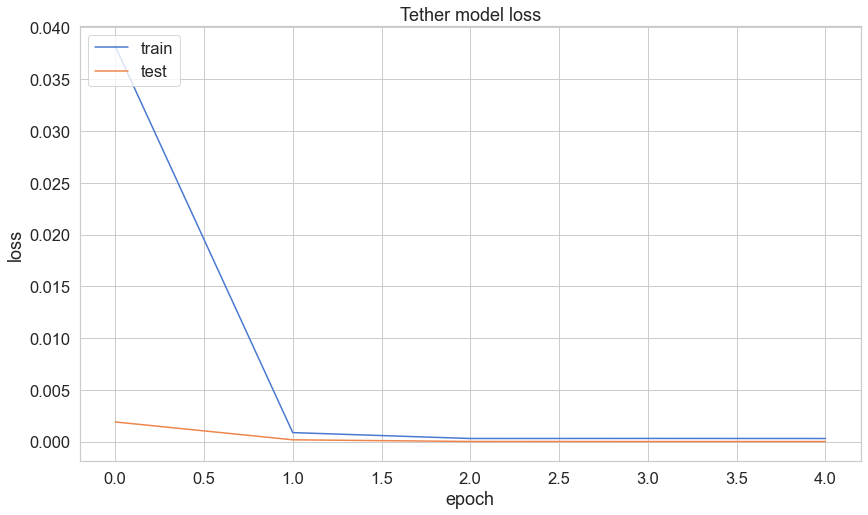

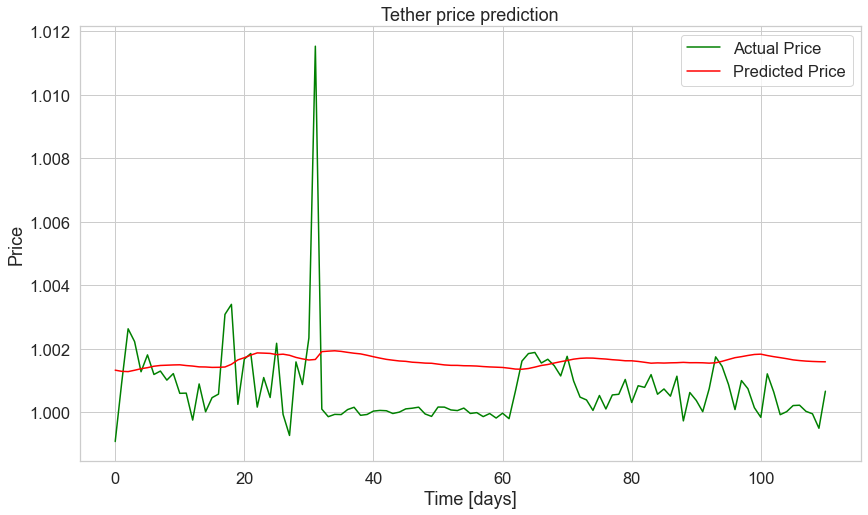







Now working on Tron


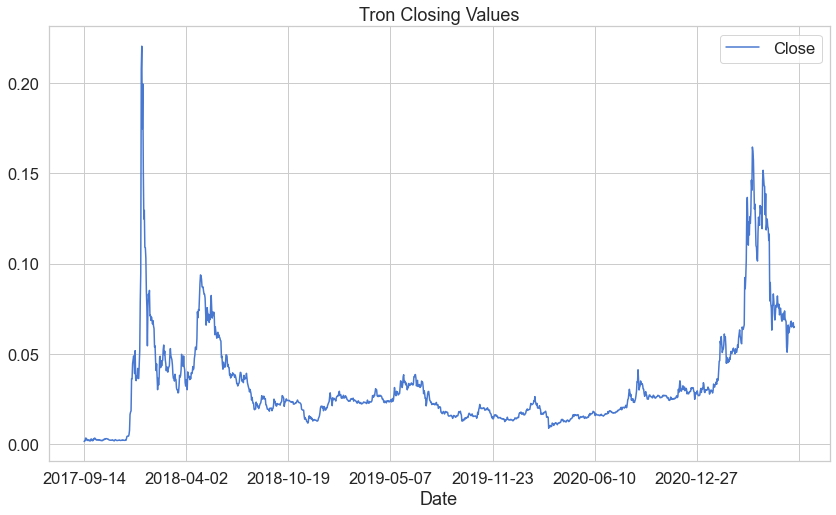

Epoch 1/5
18/18 [==============================] - 47s 2s/step - loss: 0.0109 - val_loss: 0.0463
Epoch 2/5
18/18 [==============================] - 34s 2s/step - loss: 0.0073 - val_loss: 0.0209
Epoch 3/5
18/18 [==============================] - 35s 2s/step - loss: 0.0050 - val_loss: 0.0075
Epoch 4/5
18/18 [==============================] - 35s 2s/step - loss: 0.0026 - val_loss: 0.0071
Epoch 5/5
18/18 [==============================] - 35s 2s/step - loss: 0.0022 - val_loss: 0.0062


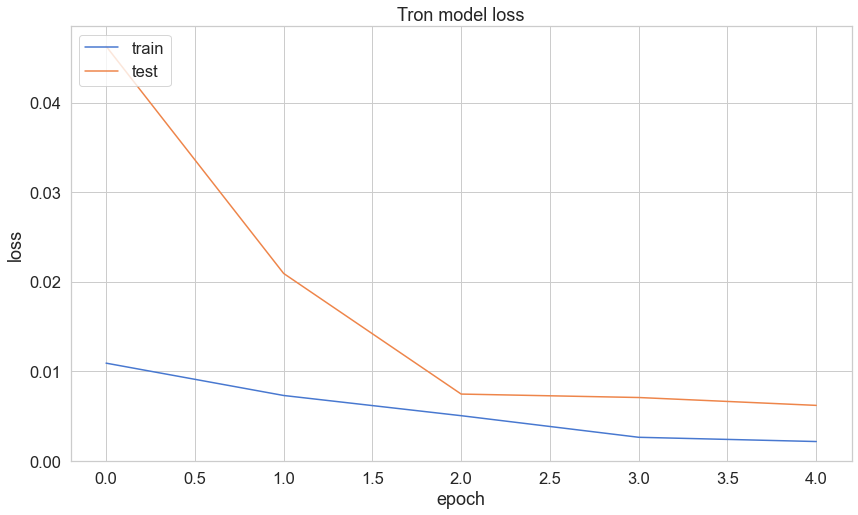

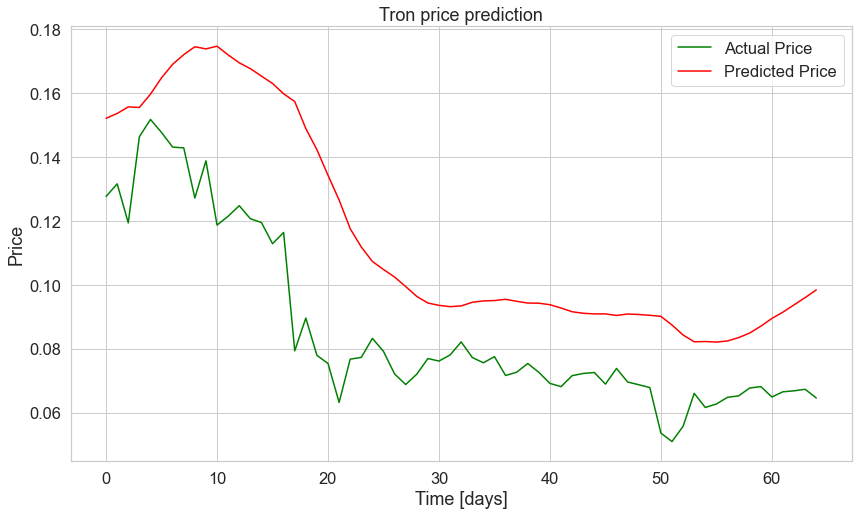







Now working on USDCoin


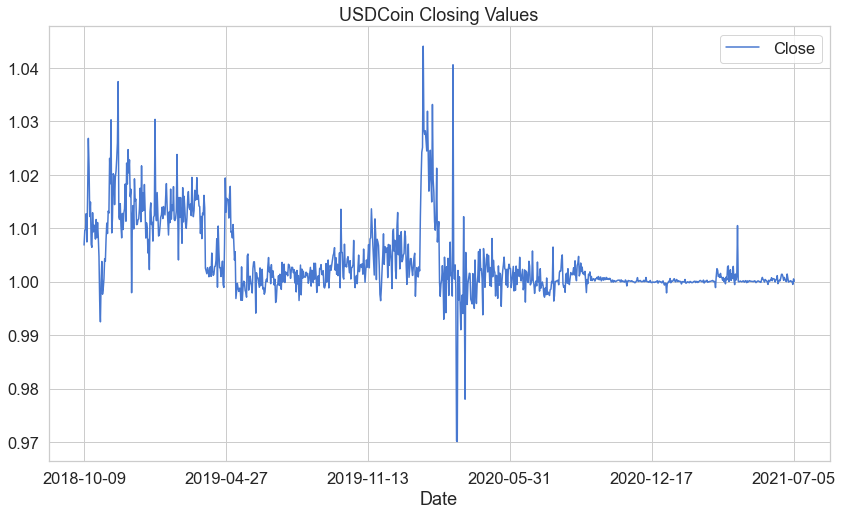

Epoch 1/5
13/13 [==============================] - 36s 2s/step - loss: 0.0457 - val_loss: 0.0044
Epoch 2/5
13/13 [==============================] - 24s 2s/step - loss: 0.0075 - val_loss: 0.0015
Epoch 3/5
13/13 [==============================] - 24s 2s/step - loss: 0.0055 - val_loss: 4.0114e-04
Epoch 4/5
13/13 [==============================] - 24s 2s/step - loss: 0.0048 - val_loss: 3.7946e-04
Epoch 5/5
13/13 [==============================] - 641s 53s/step - loss: 0.0046 - val_loss: 6.6317e-04


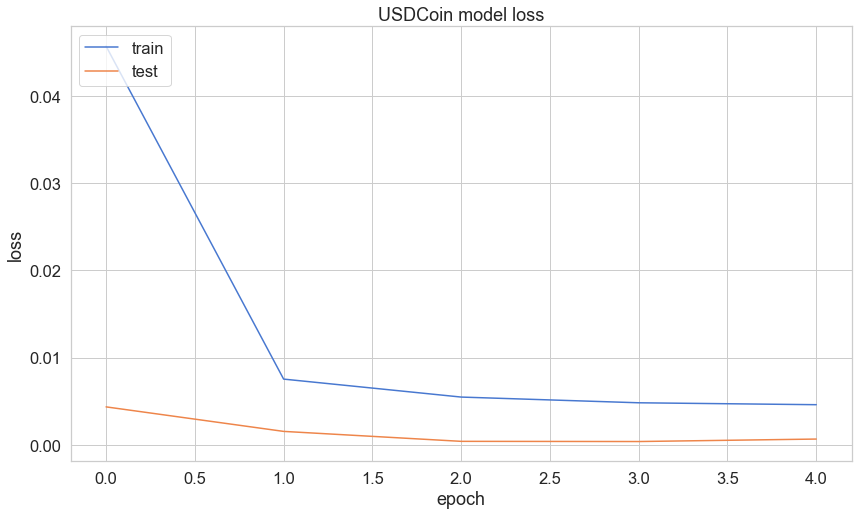

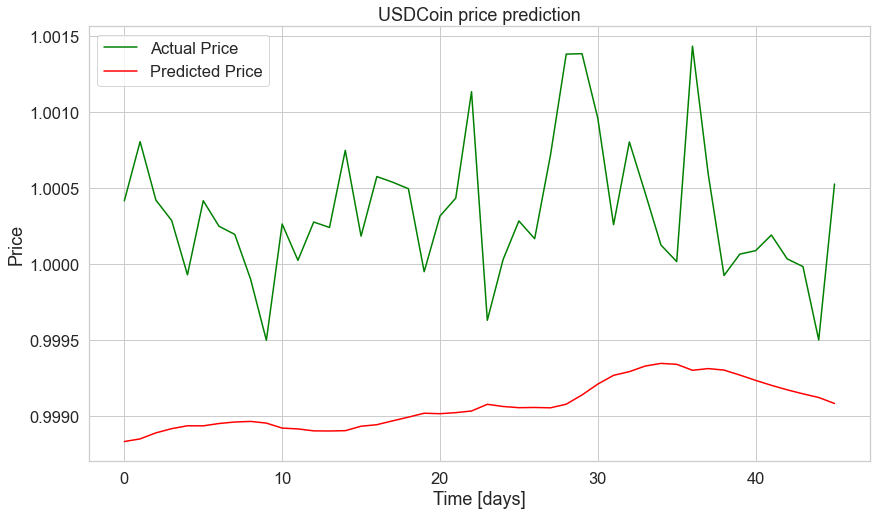







Now working on WrappedBitcoin


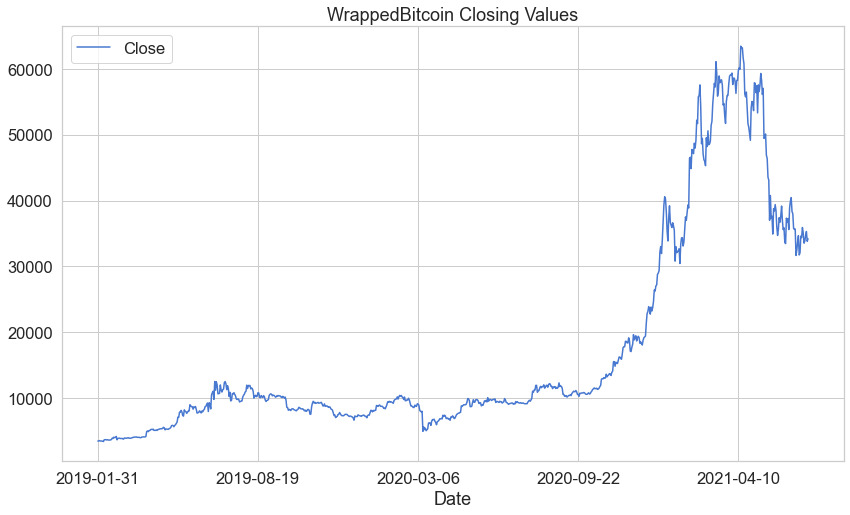

Epoch 1/5
11/11 [==============================] - 27s 2s/step - loss: 0.0186 - val_loss: 0.0182
Epoch 2/5
11/11 [==============================] - 17s 2s/step - loss: 0.0200 - val_loss: 0.0193
Epoch 3/5
11/11 [==============================] - 17s 2s/step - loss: 0.0110 - val_loss: 0.0239
Epoch 4/5
11/11 [==============================] - 17s 2s/step - loss: 0.0112 - val_loss: 0.0105
Epoch 5/5
11/11 [==============================] - 18s 2s/step - loss: 0.0322 - val_loss: 0.1850


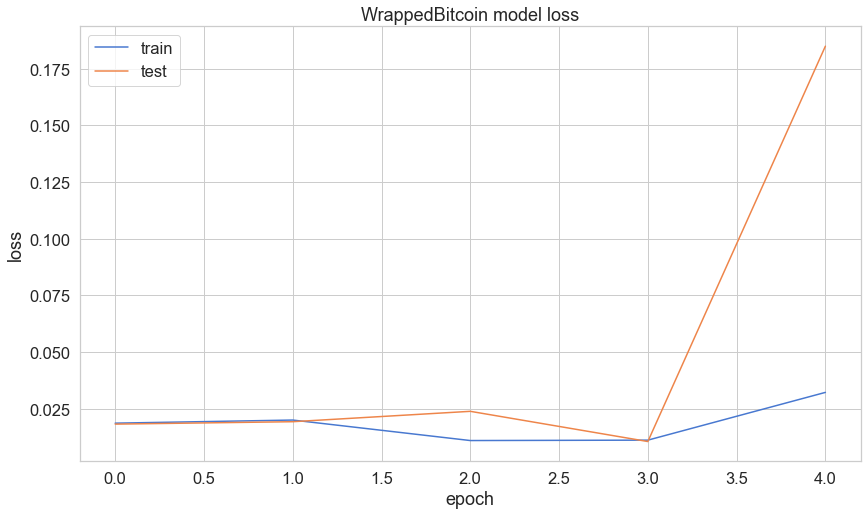

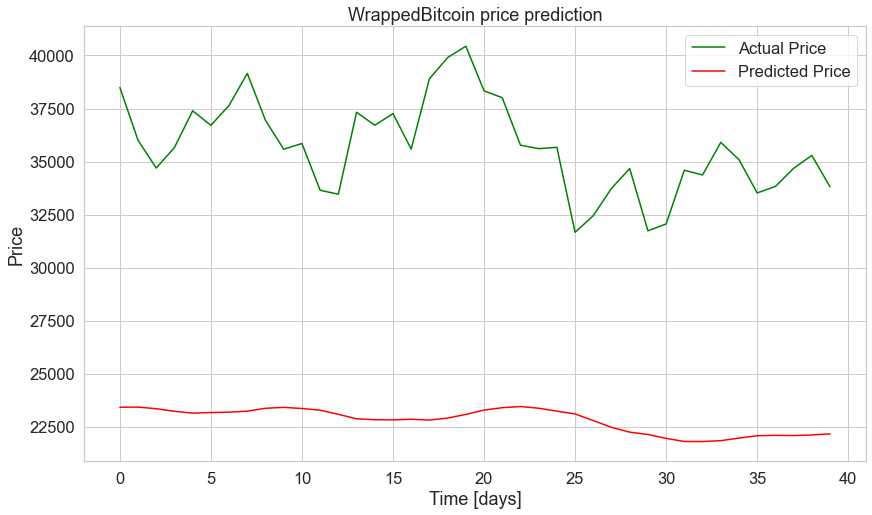







Now working on XRP


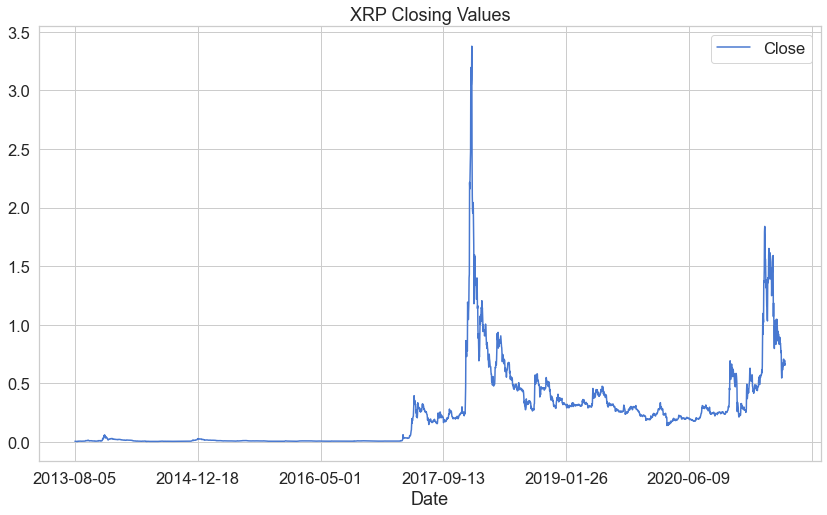

Epoch 1/5
38/38 [==============================] - 75s 2s/step - loss: 0.0033 - val_loss: 6.7722e-04
Epoch 2/5
38/38 [==============================] - 63s 2s/step - loss: 0.0049 - val_loss: 7.7885e-04
Epoch 3/5
38/38 [==============================] - 71s 2s/step - loss: 0.0023 - val_loss: 8.5148e-04
Epoch 4/5
38/38 [==============================] - 74s 2s/step - loss: 0.0014 - val_loss: 4.9352e-04
Epoch 5/5
38/38 [==============================] - 74s 2s/step - loss: 0.0032 - val_loss: 0.0017


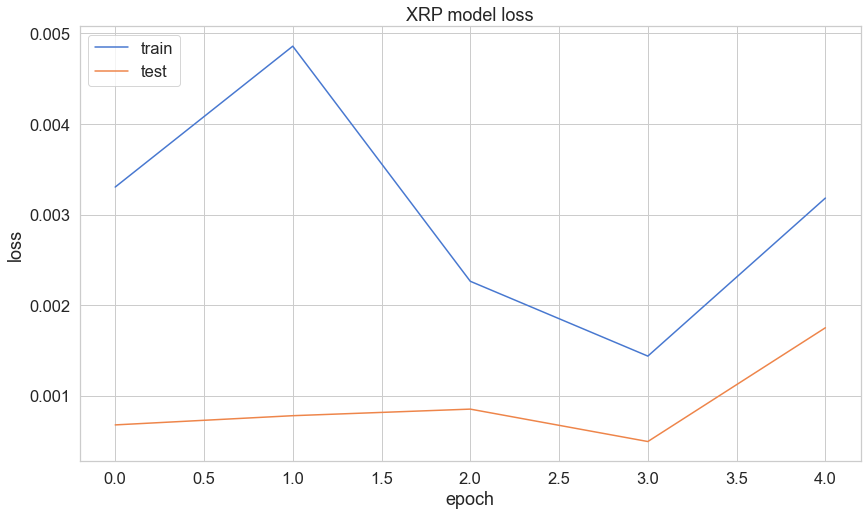

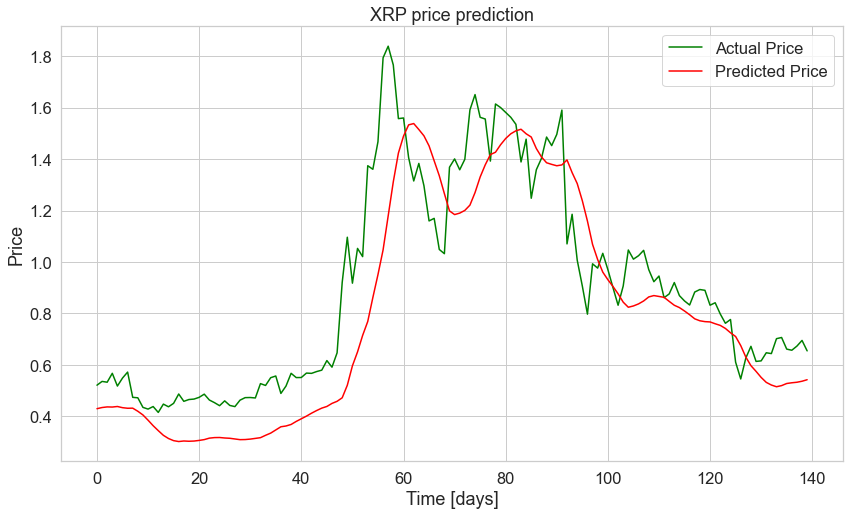

In [5]:
for x in files:
    df = pd.read_csv(x)
    name = x[:-4]
    print(f'Now working on {name}')
    init_data(df, name)
    train_evaluate(df, name)
    print("\n"*5)
    

Now working on BinanceCoin


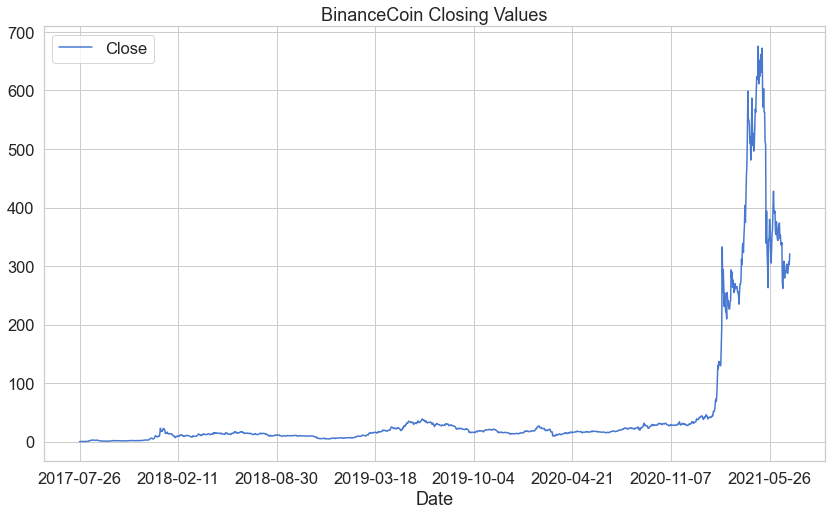







Now working on Bitcoin


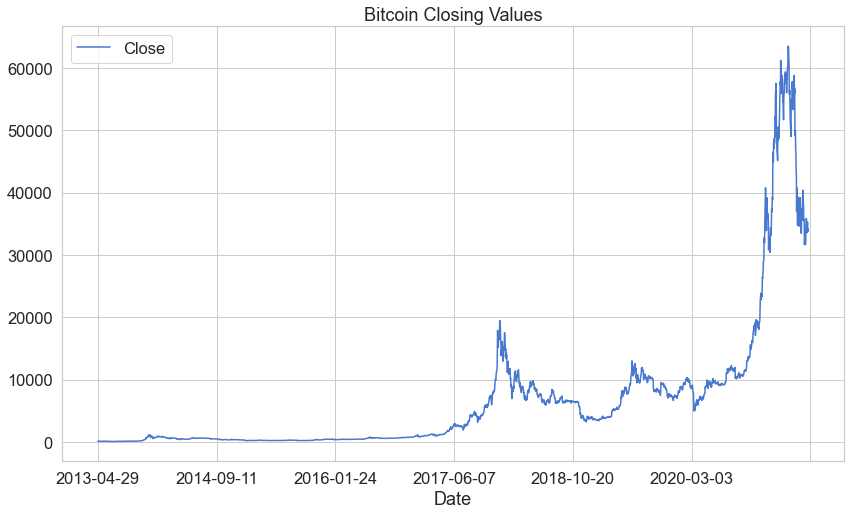







Now working on Cardano


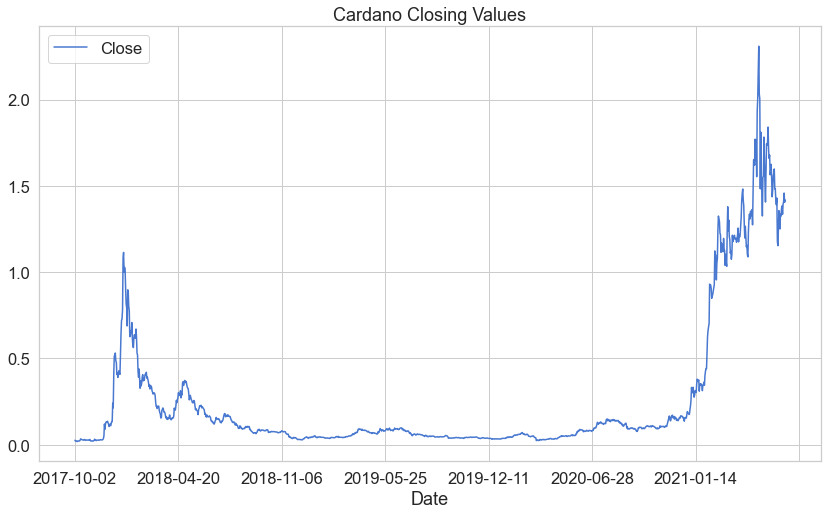







Now working on ChainLink


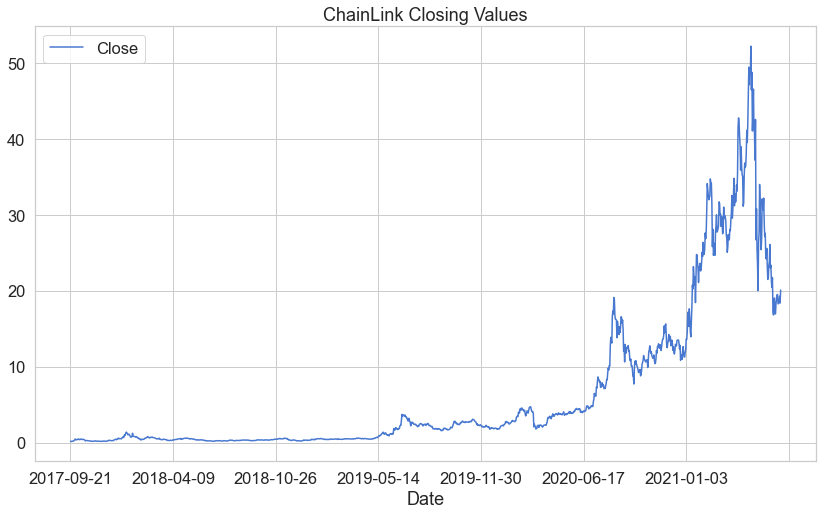







Now working on Cosmos


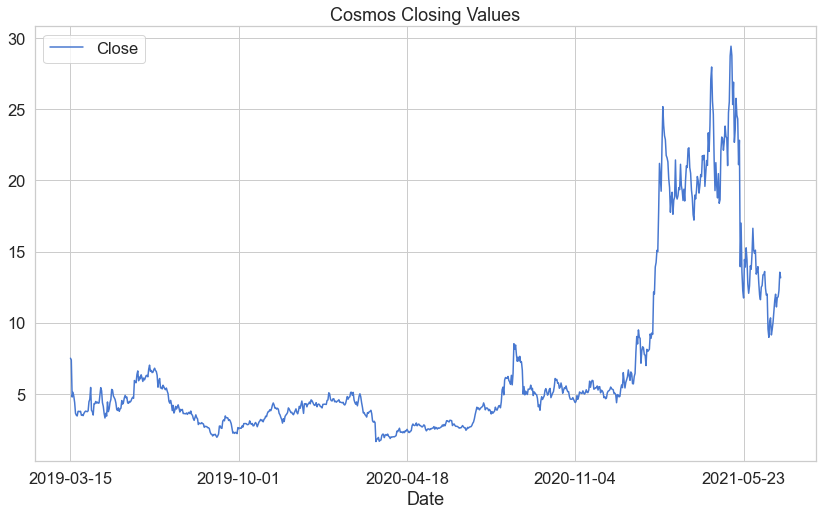







Now working on CryptocomCoin


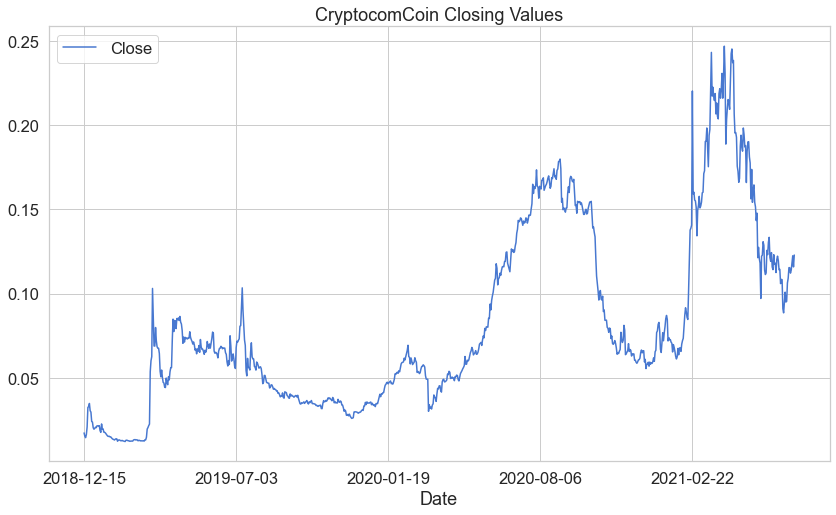







Now working on Dogecoin


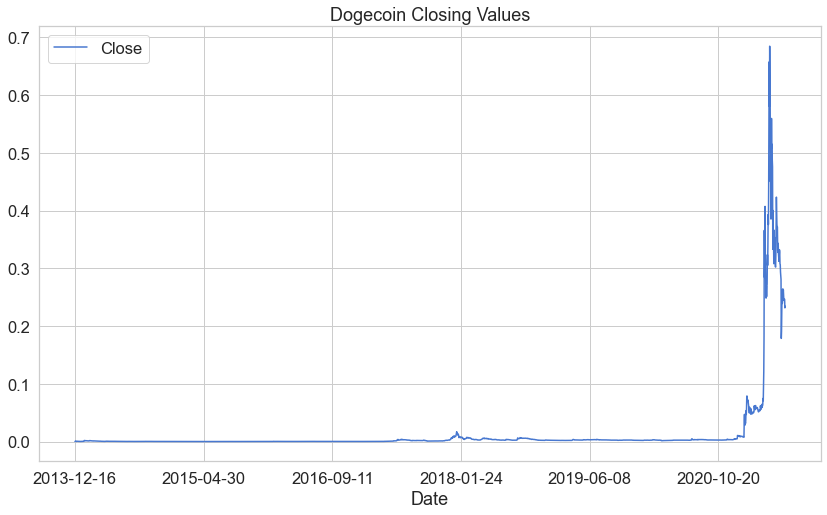







Now working on EOS


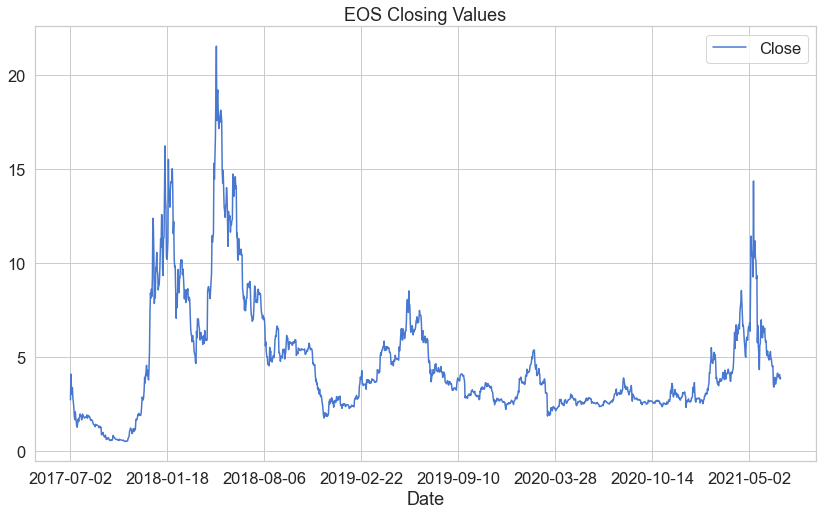







Now working on Ethereum


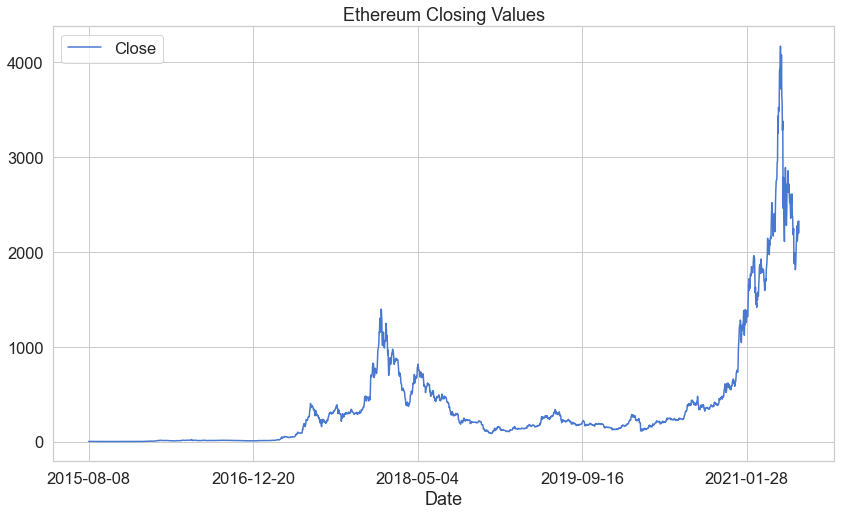







Now working on Iota


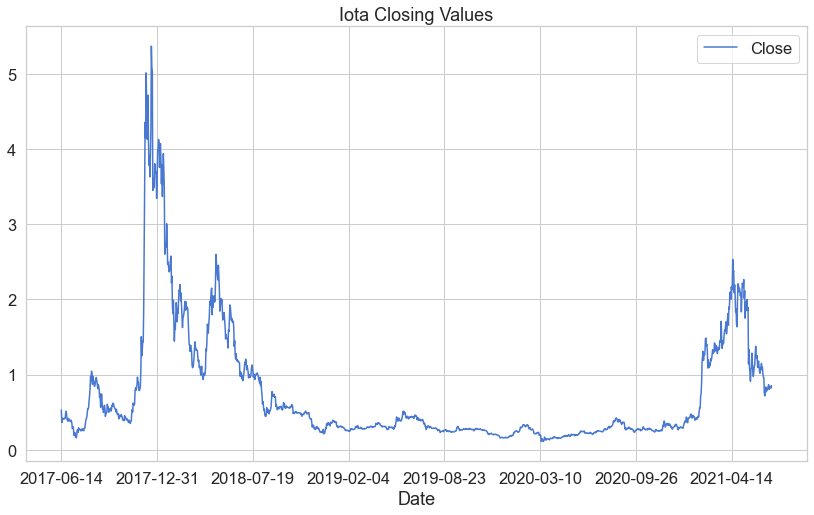







Now working on Litecoin


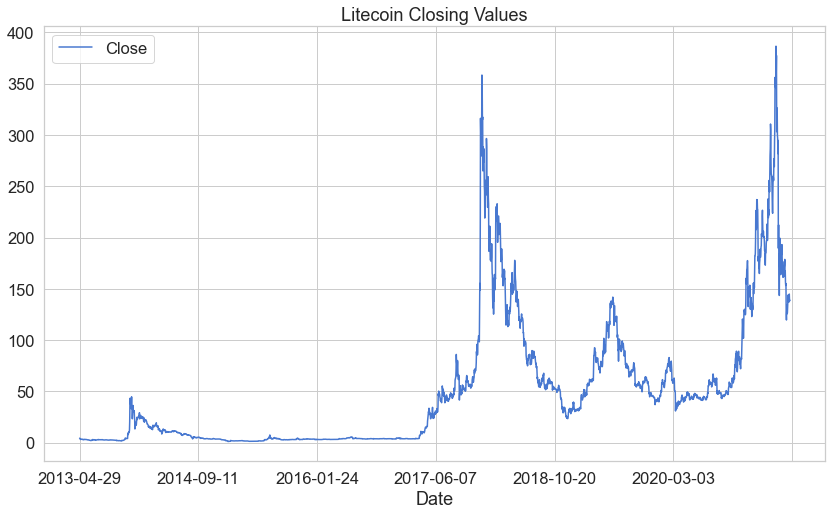







Now working on Monero


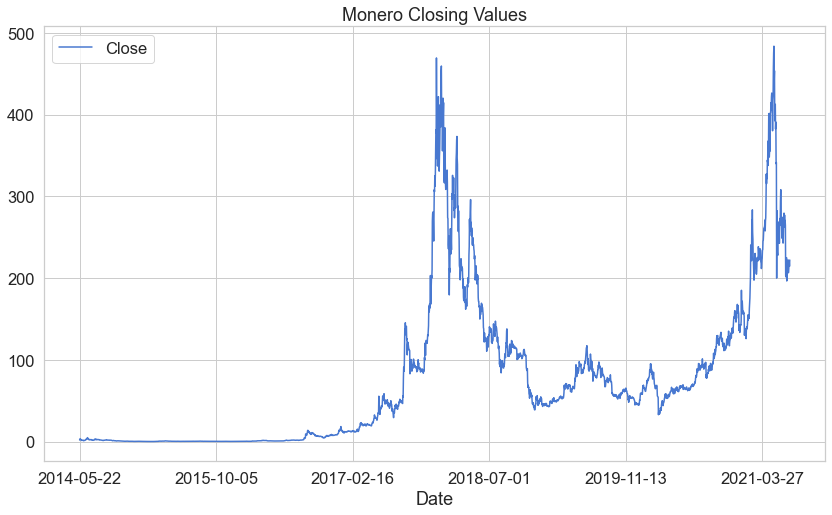







Now working on NEM


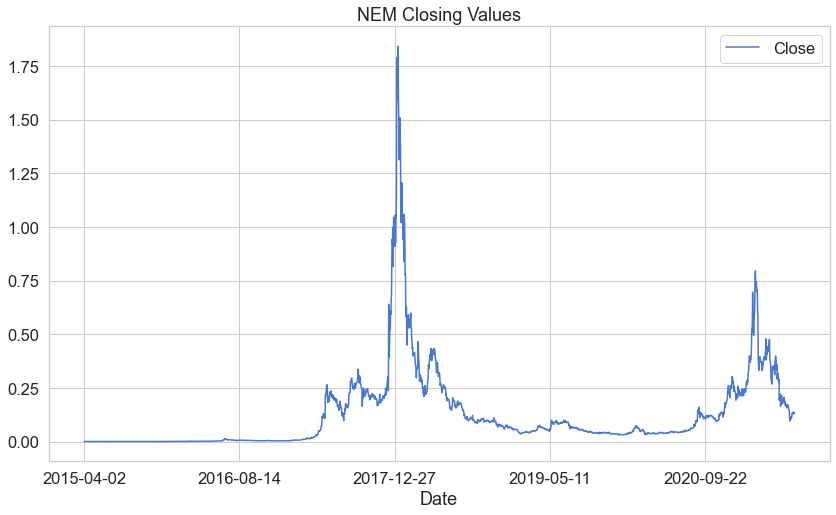







Now working on Solana


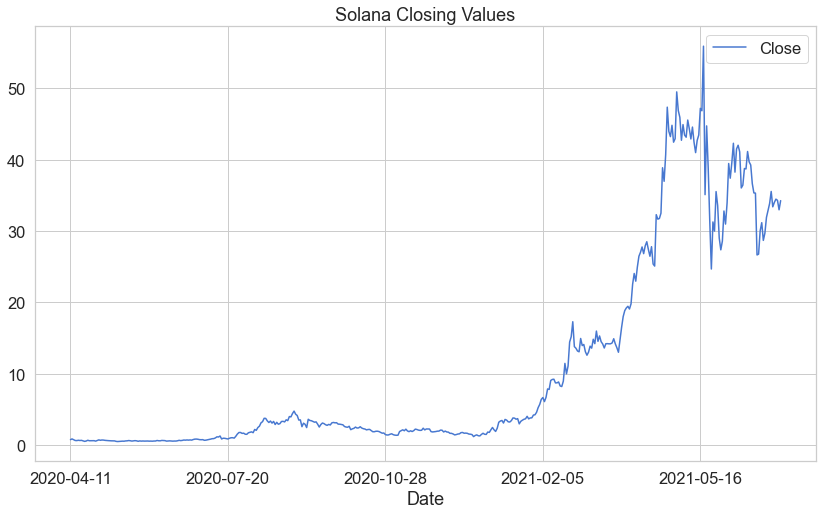







Now working on Stellar


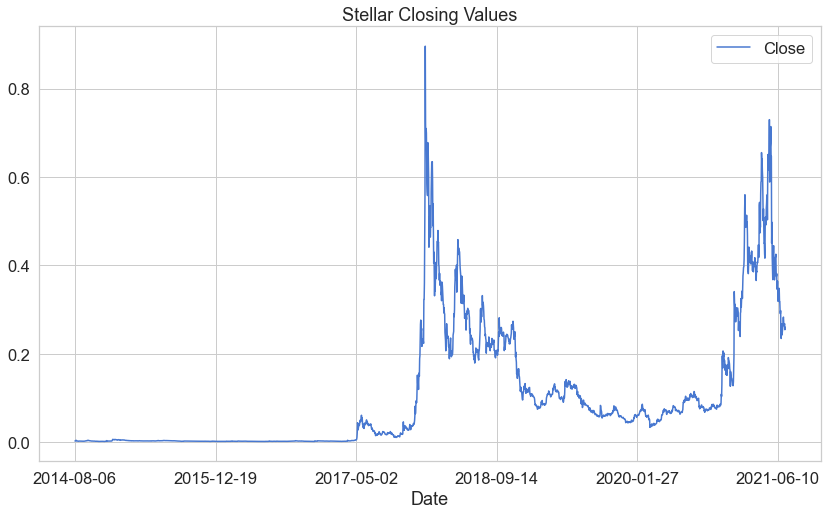







Now working on Tether


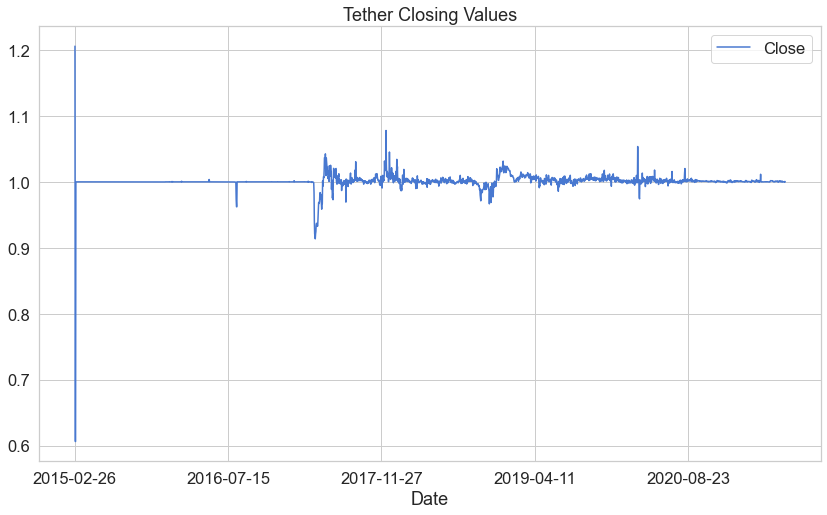







Now working on Tron


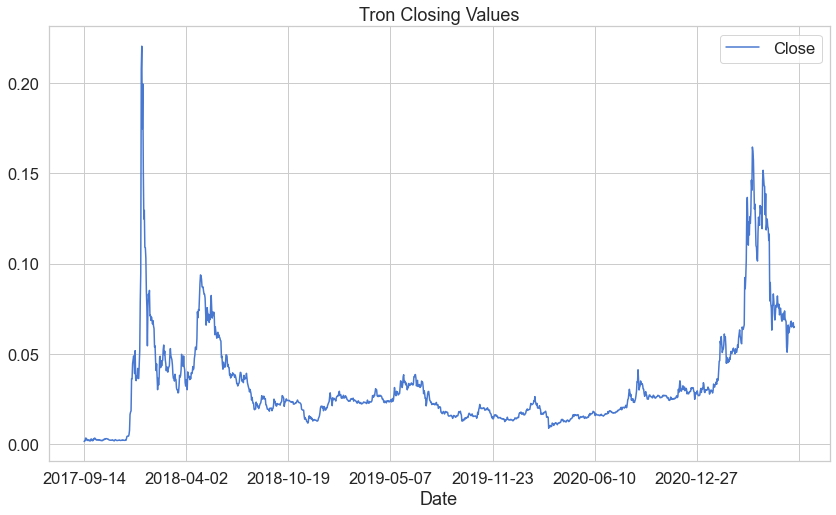







Now working on USDCoin


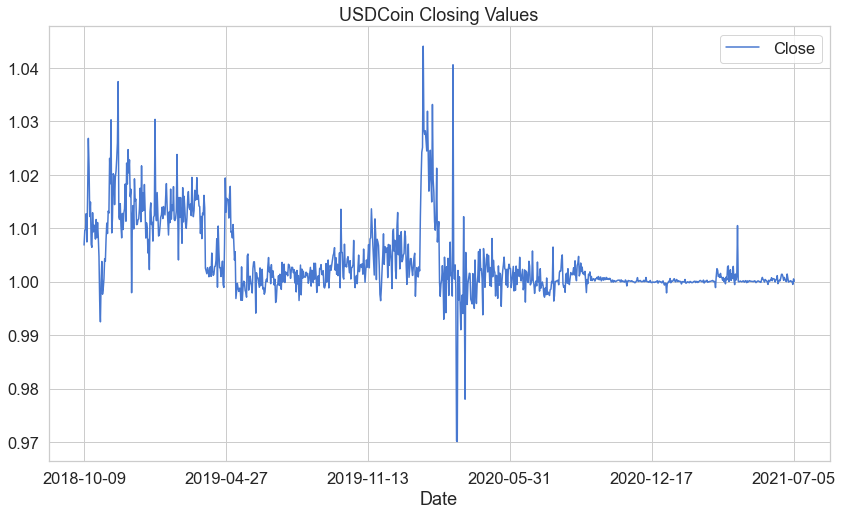







Now working on WrappedBitcoin


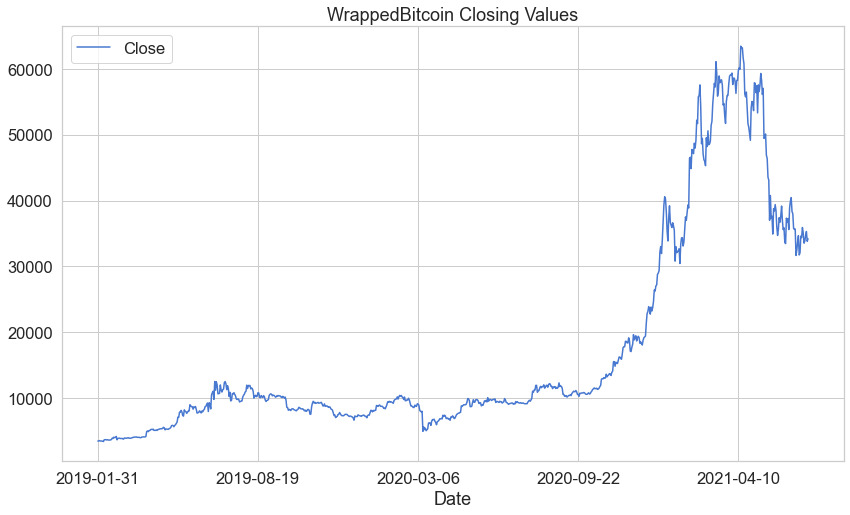







Now working on XRP


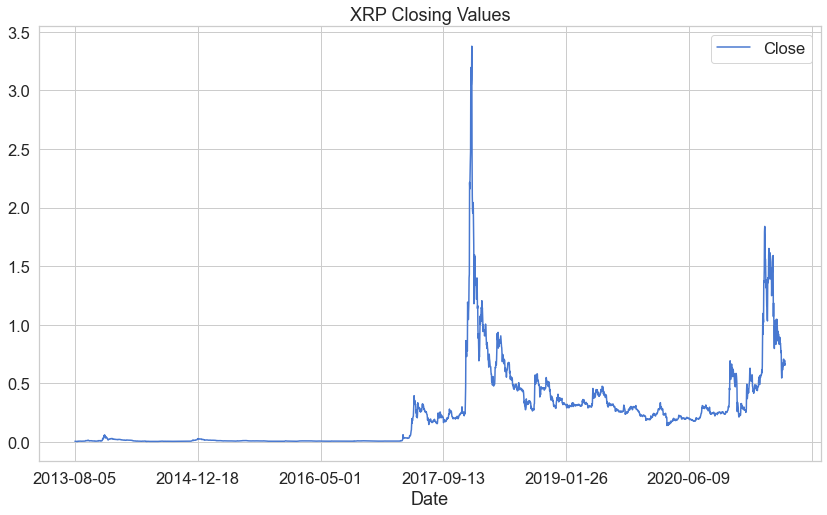

In [6]:
for x in files:
    df = pd.read_csv(x)
    name = x[:-4]
    print(f'Now working on {name}')
    init_data(df, name)
    print("\n"*5)


In [ ]:
nn.save('cryptomodel.h5')